Klasy:  ['M' 'B']
Liczba próbek:  569
Liczba próbek w klasach:
B    357
M    212
Name: diagnosis, dtype: int64
Brakujące wartości:  0
[[85  4]
 [ 3 51]]
              precision    recall  f1-score   support

           B       0.97      0.96      0.96        89
           M       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



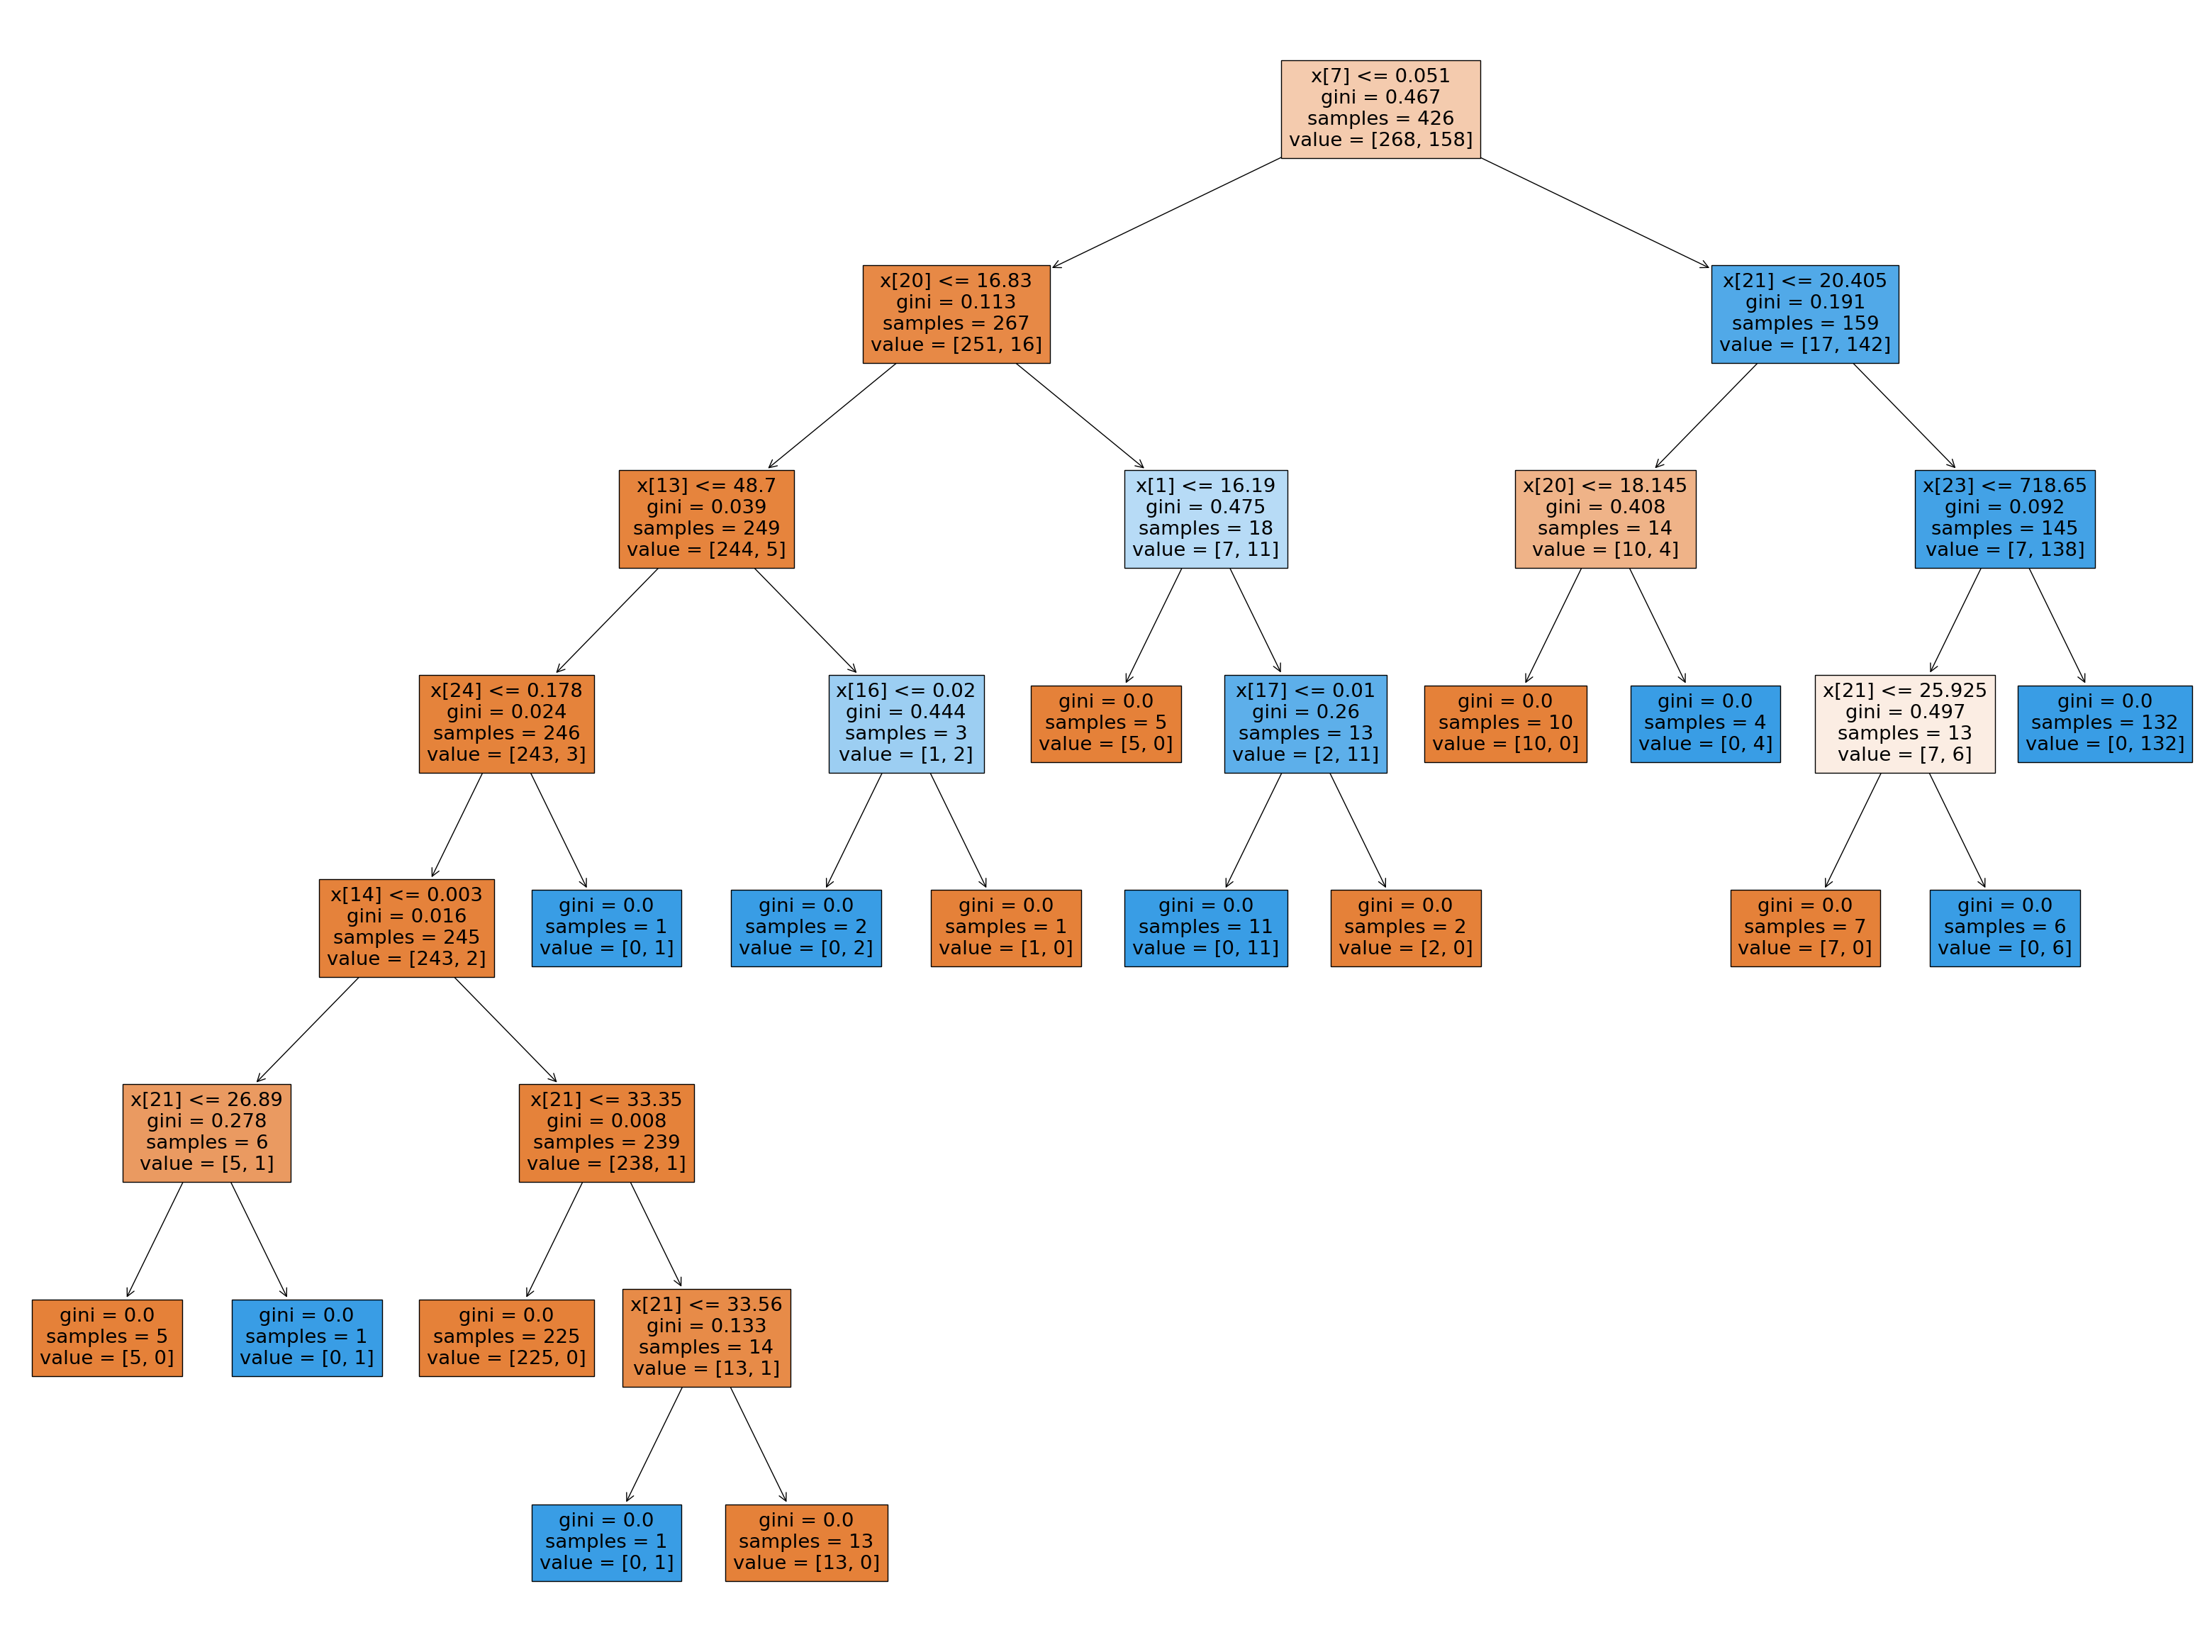

In [1]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

# Wczytanie danych
data = pd.read_csv("C:/Users/User/Desktop/lab4/wdbc (1).data",sep=",", header=None)
data.columns = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
                "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", 
                "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", 
                "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", 
                "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", 
                "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", 
                "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]

data = data.drop(["id"], axis=1)

# Wypisanie informacji o klasach i liczbach próbek
print("Klasy: ", data['diagnosis'].unique())
print("Liczba próbek: ", len(data))
print("Liczba próbek w klasach:")
print(data['diagnosis'].value_counts())

# usuwanie brakujacych
print("Brakujące wartości: ", data.isnull().sum().sum())

# podział na  test i train 
X = data.drop(["diagnosis"], axis=1)
y = data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#  drzewo decyzyjne
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# predykcja dla danych testowych
predictions = clf.predict(X_test)


#  macierzy pomyłek i statystyk klasyfikacji
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

#wyświetlanie drzewa
plt.figure(figsize=(40,30))
tree.plot_tree(clf, filled=True)
plt.show()


Score dla leaf = 5: 0.965034965034965


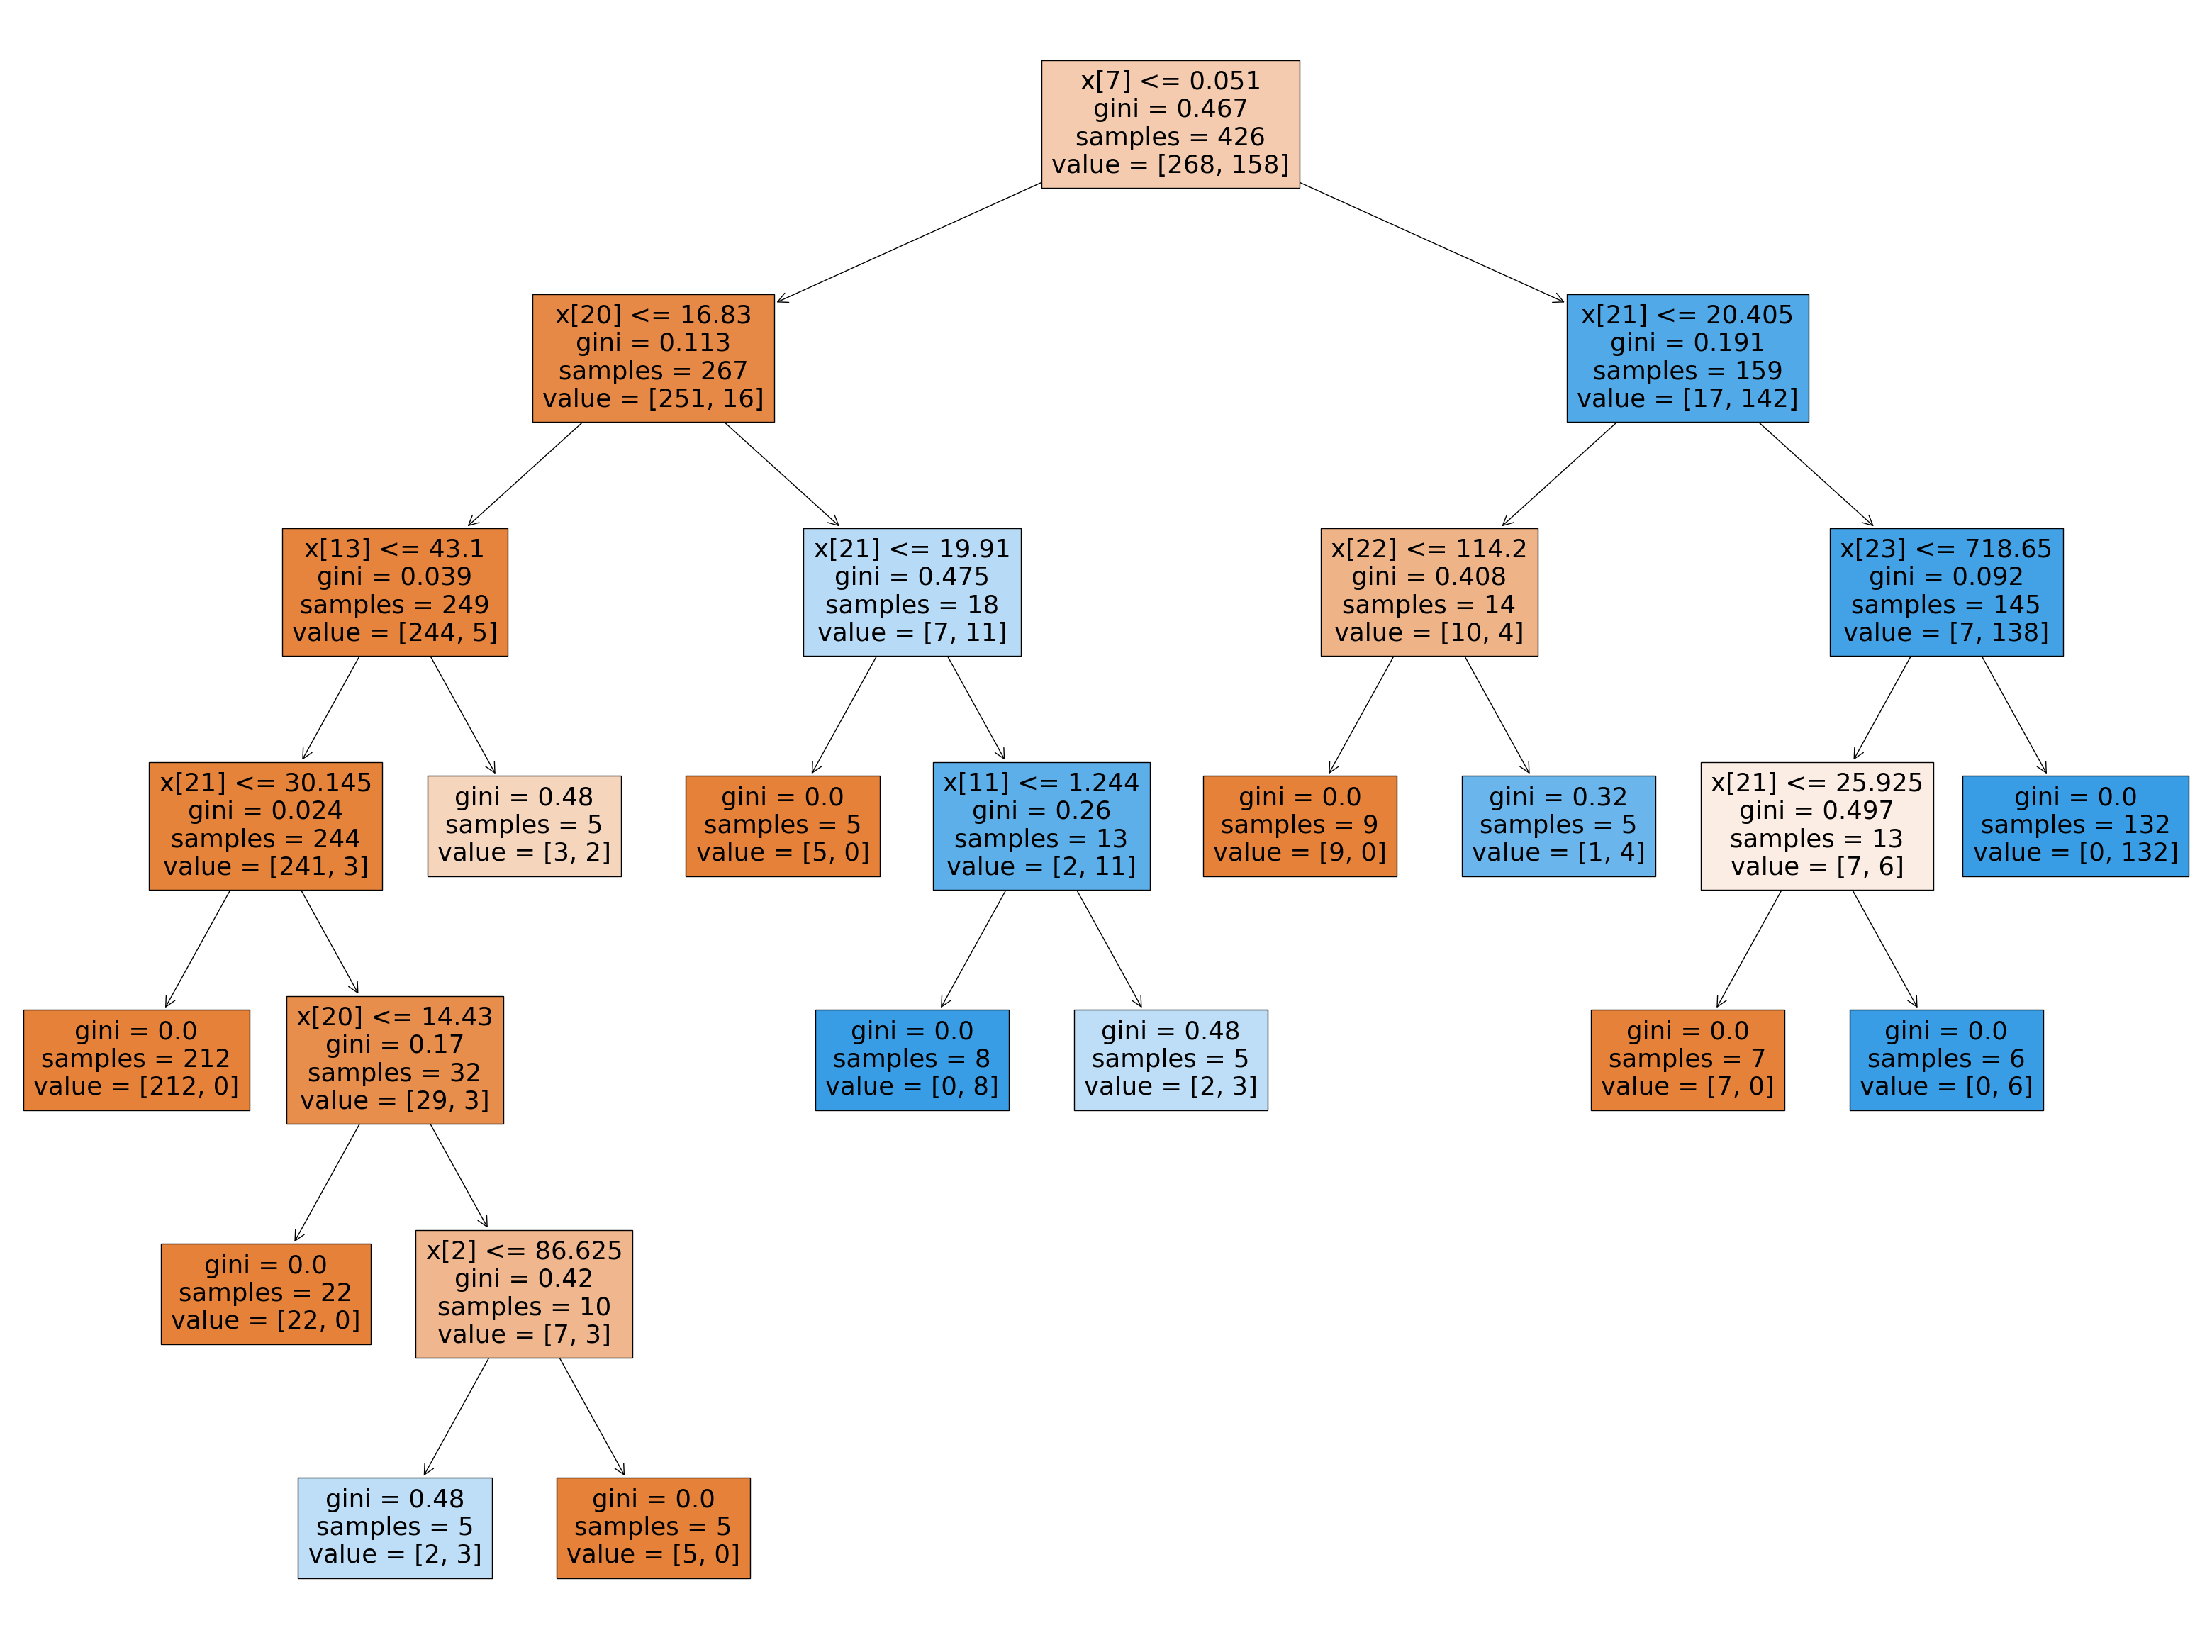

Score dla leaf = 10: 0.9300699300699301


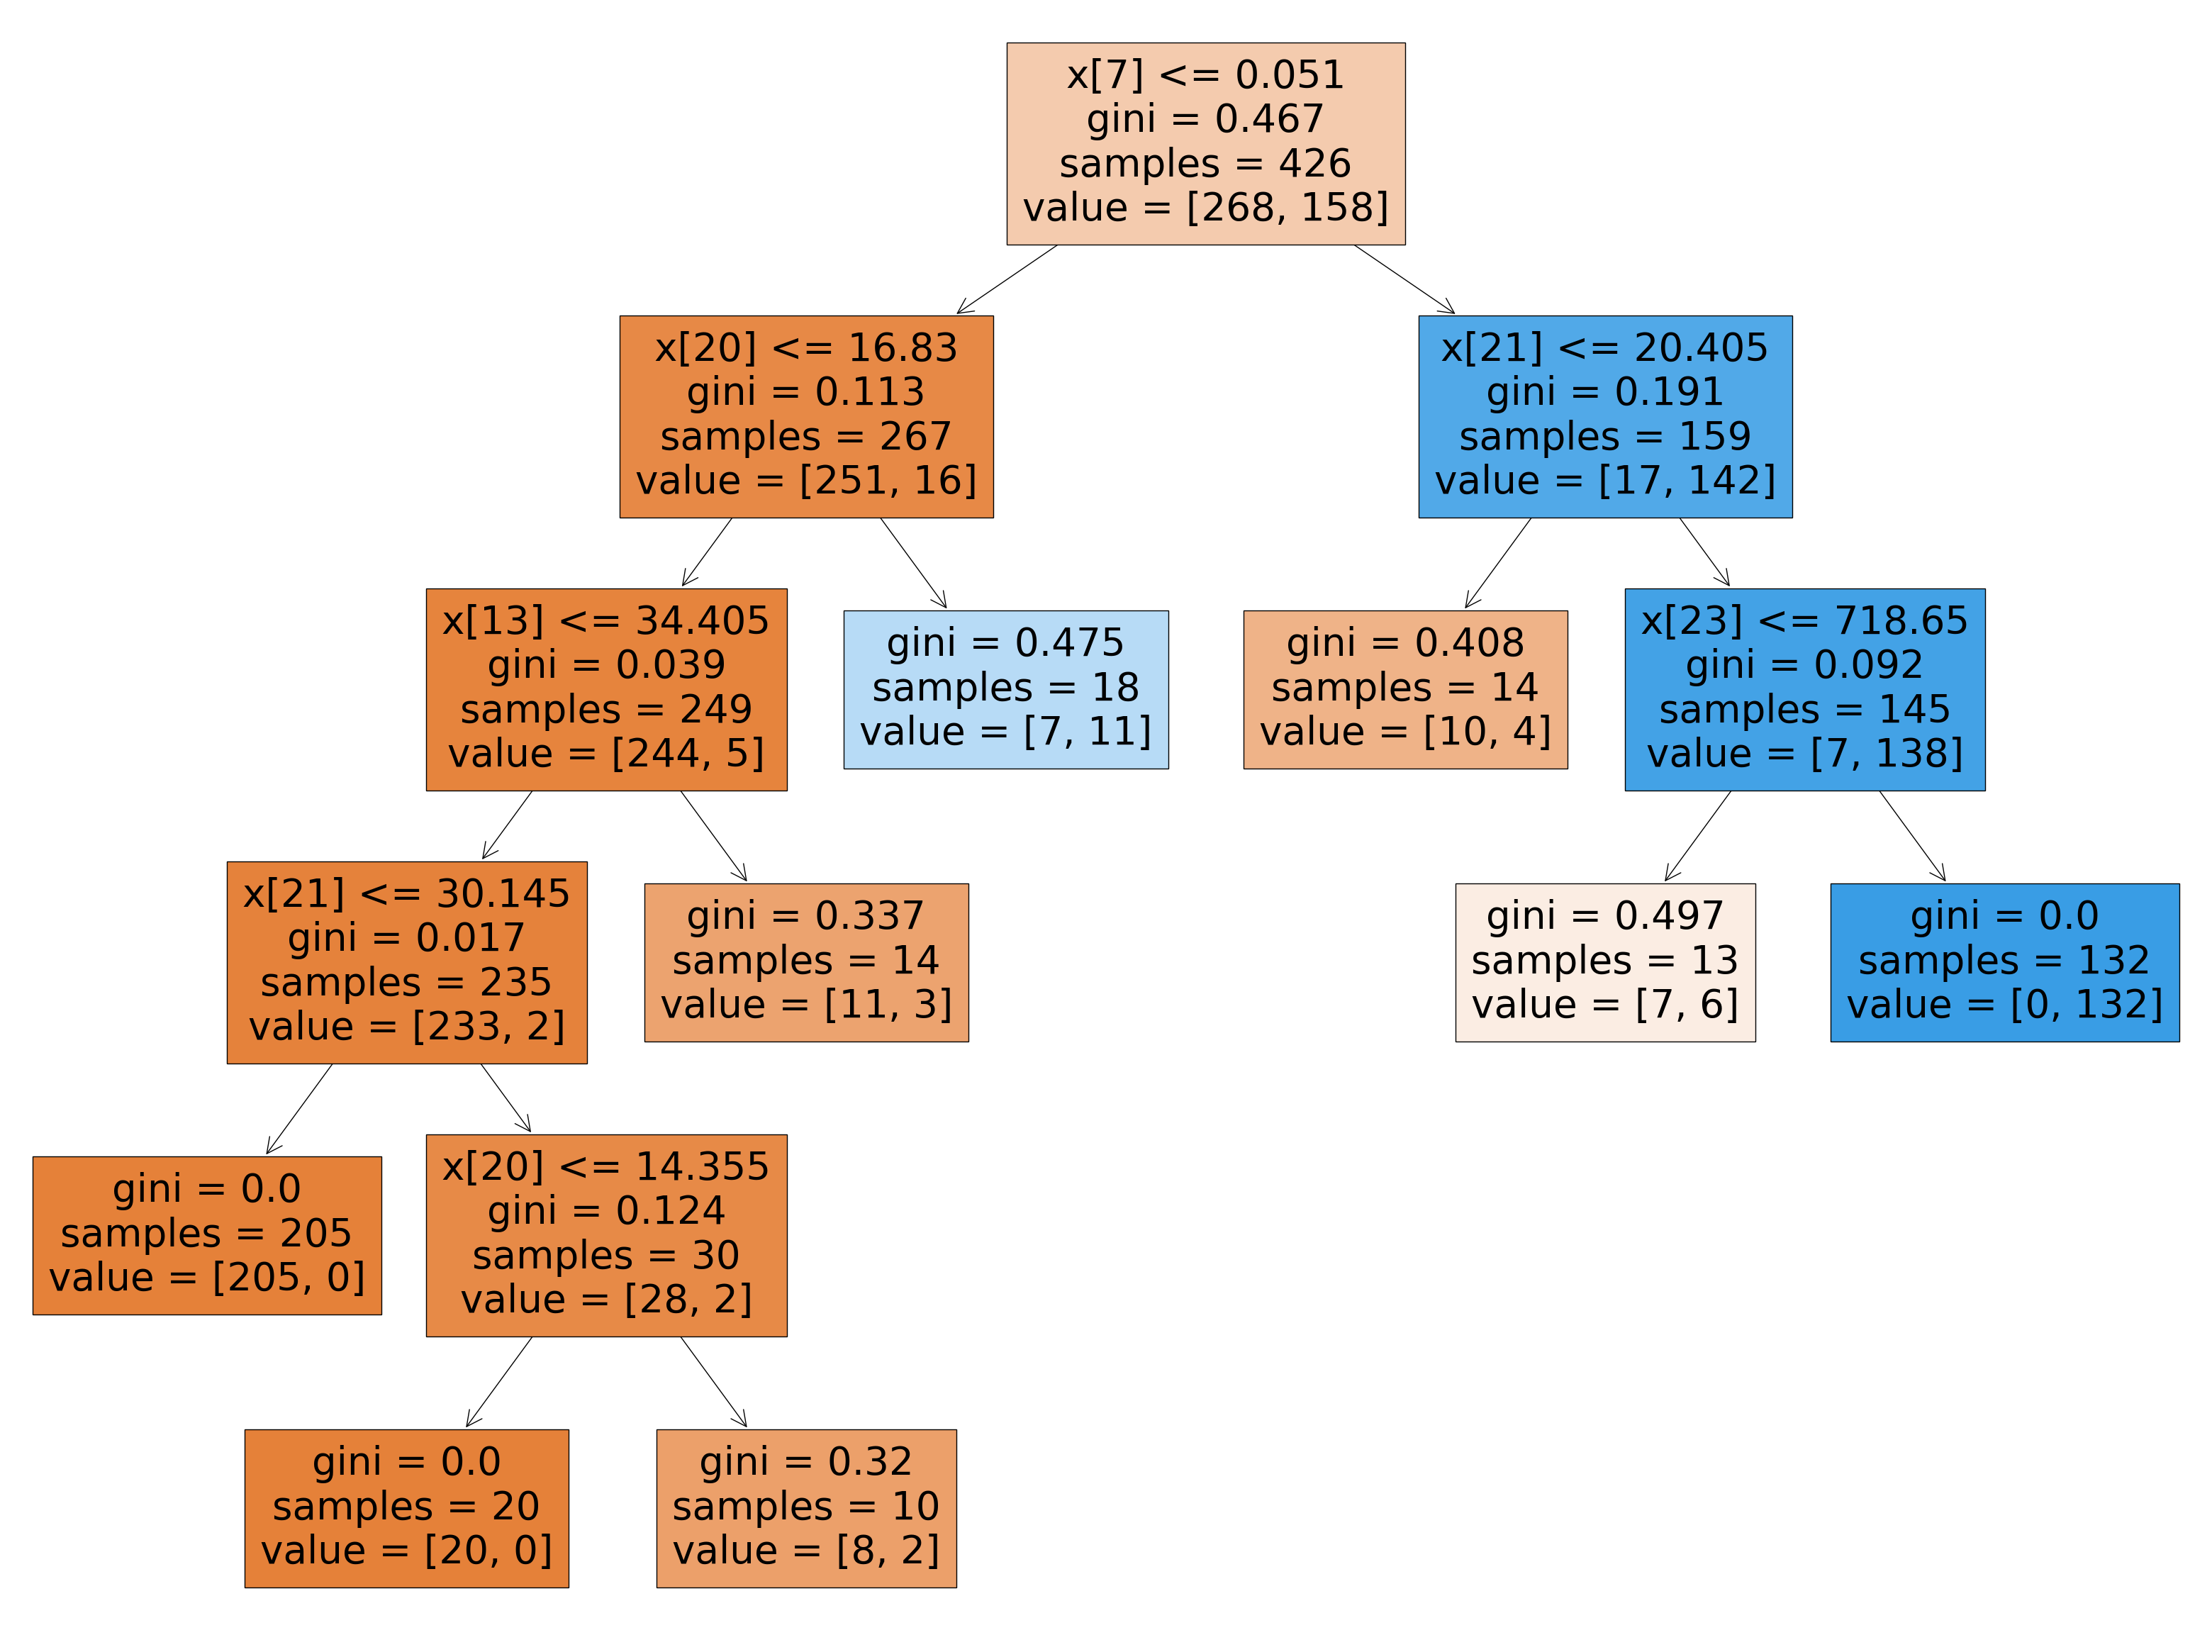

Score dla leaf = 25: 0.8951048951048951


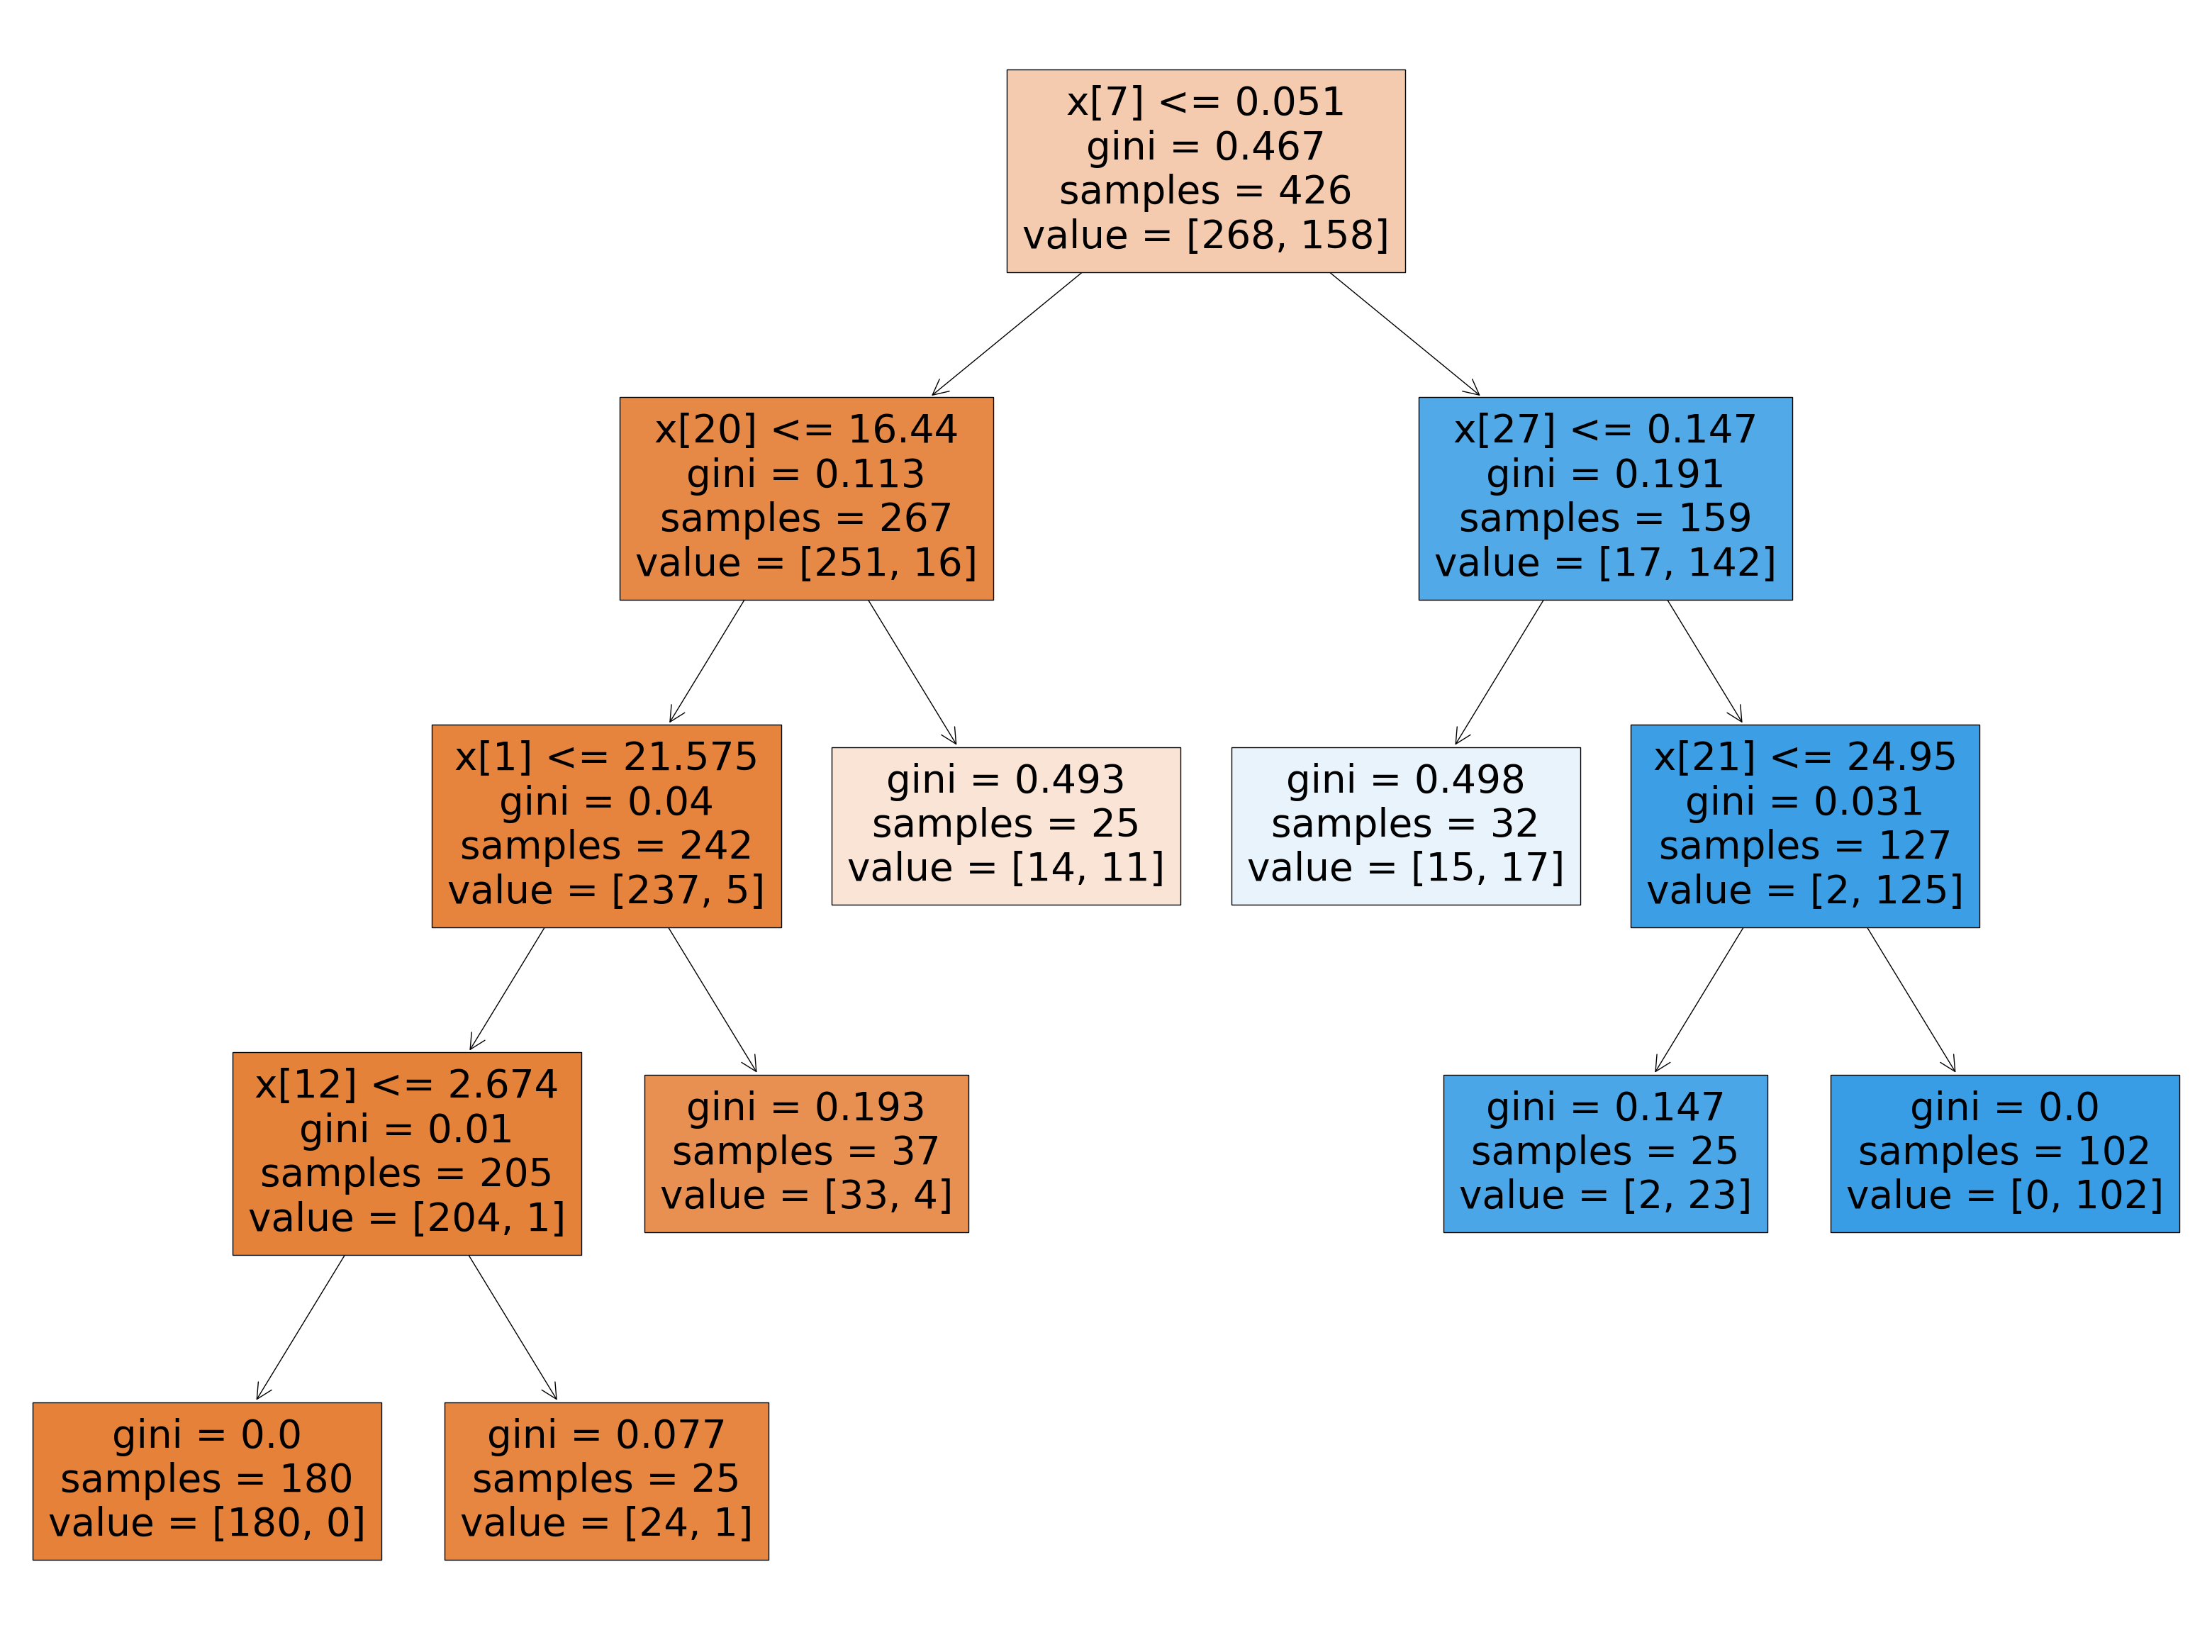

In [2]:

# min_samples_leaf
for leaf in [5, 10, 25]:
    clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=leaf)
    clf.fit(X_train, y_train)
    print(f"Score dla leaf = {leaf}: {clf.score(X_test, y_test)}")
    plt.figure(figsize=(40,30))
    tree.plot_tree(clf, filled=True)
    plt.show()
# parametr decyzduje o dalszym podziale na nody, ale sprawdzając wcześniej czy po podziale w obu nodach będzie przynajmniej 
# odpowiednia liczba danych ustalona przez ten parametr. Jeśli to musi wybrać inną cechę do podjęcia decyzji, która 
# która będzie spełniać ten warunek.
#Wniosek: parametr pozwala na zablokowanie zbytniego rozdrabniania danych w liściach. W pewien sposob ogranicza to wystepowanie
# przeuczenia. Jeżeli danych jest za mało to w skrajnym przypadku nie następuje już dalszy podział. 






max_depth = 1: 0.8951048951048951


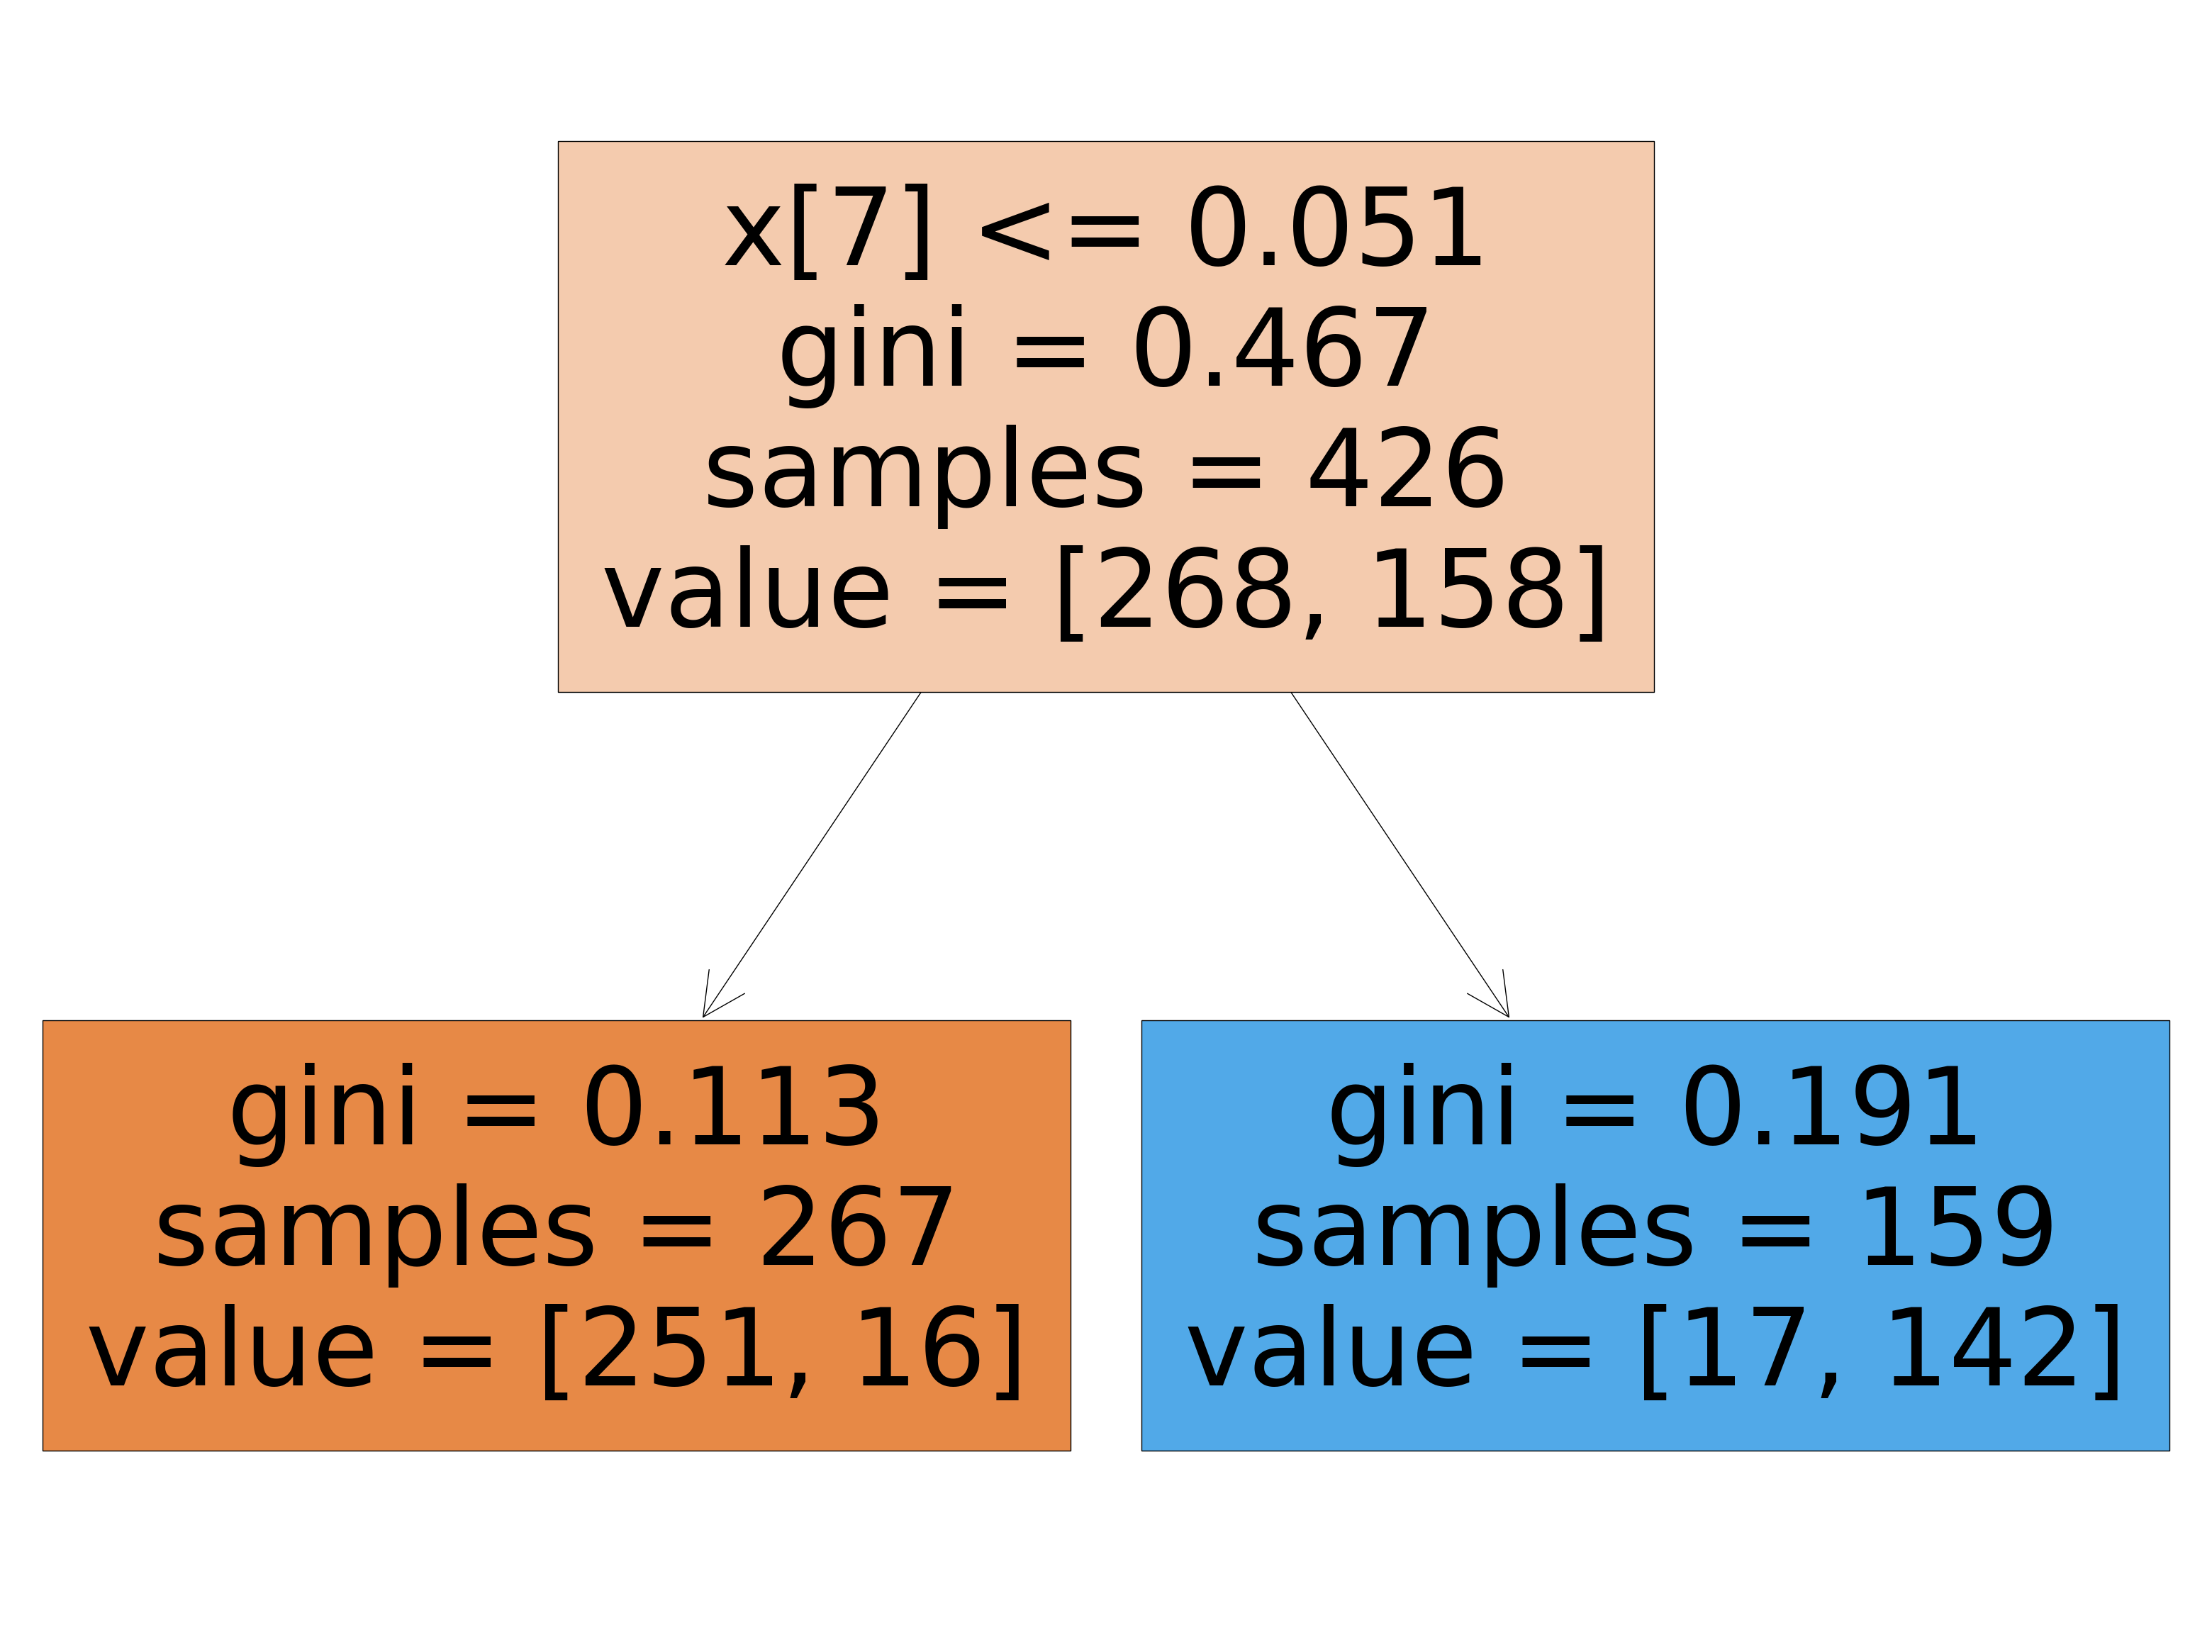

max_depth = 5: 0.958041958041958


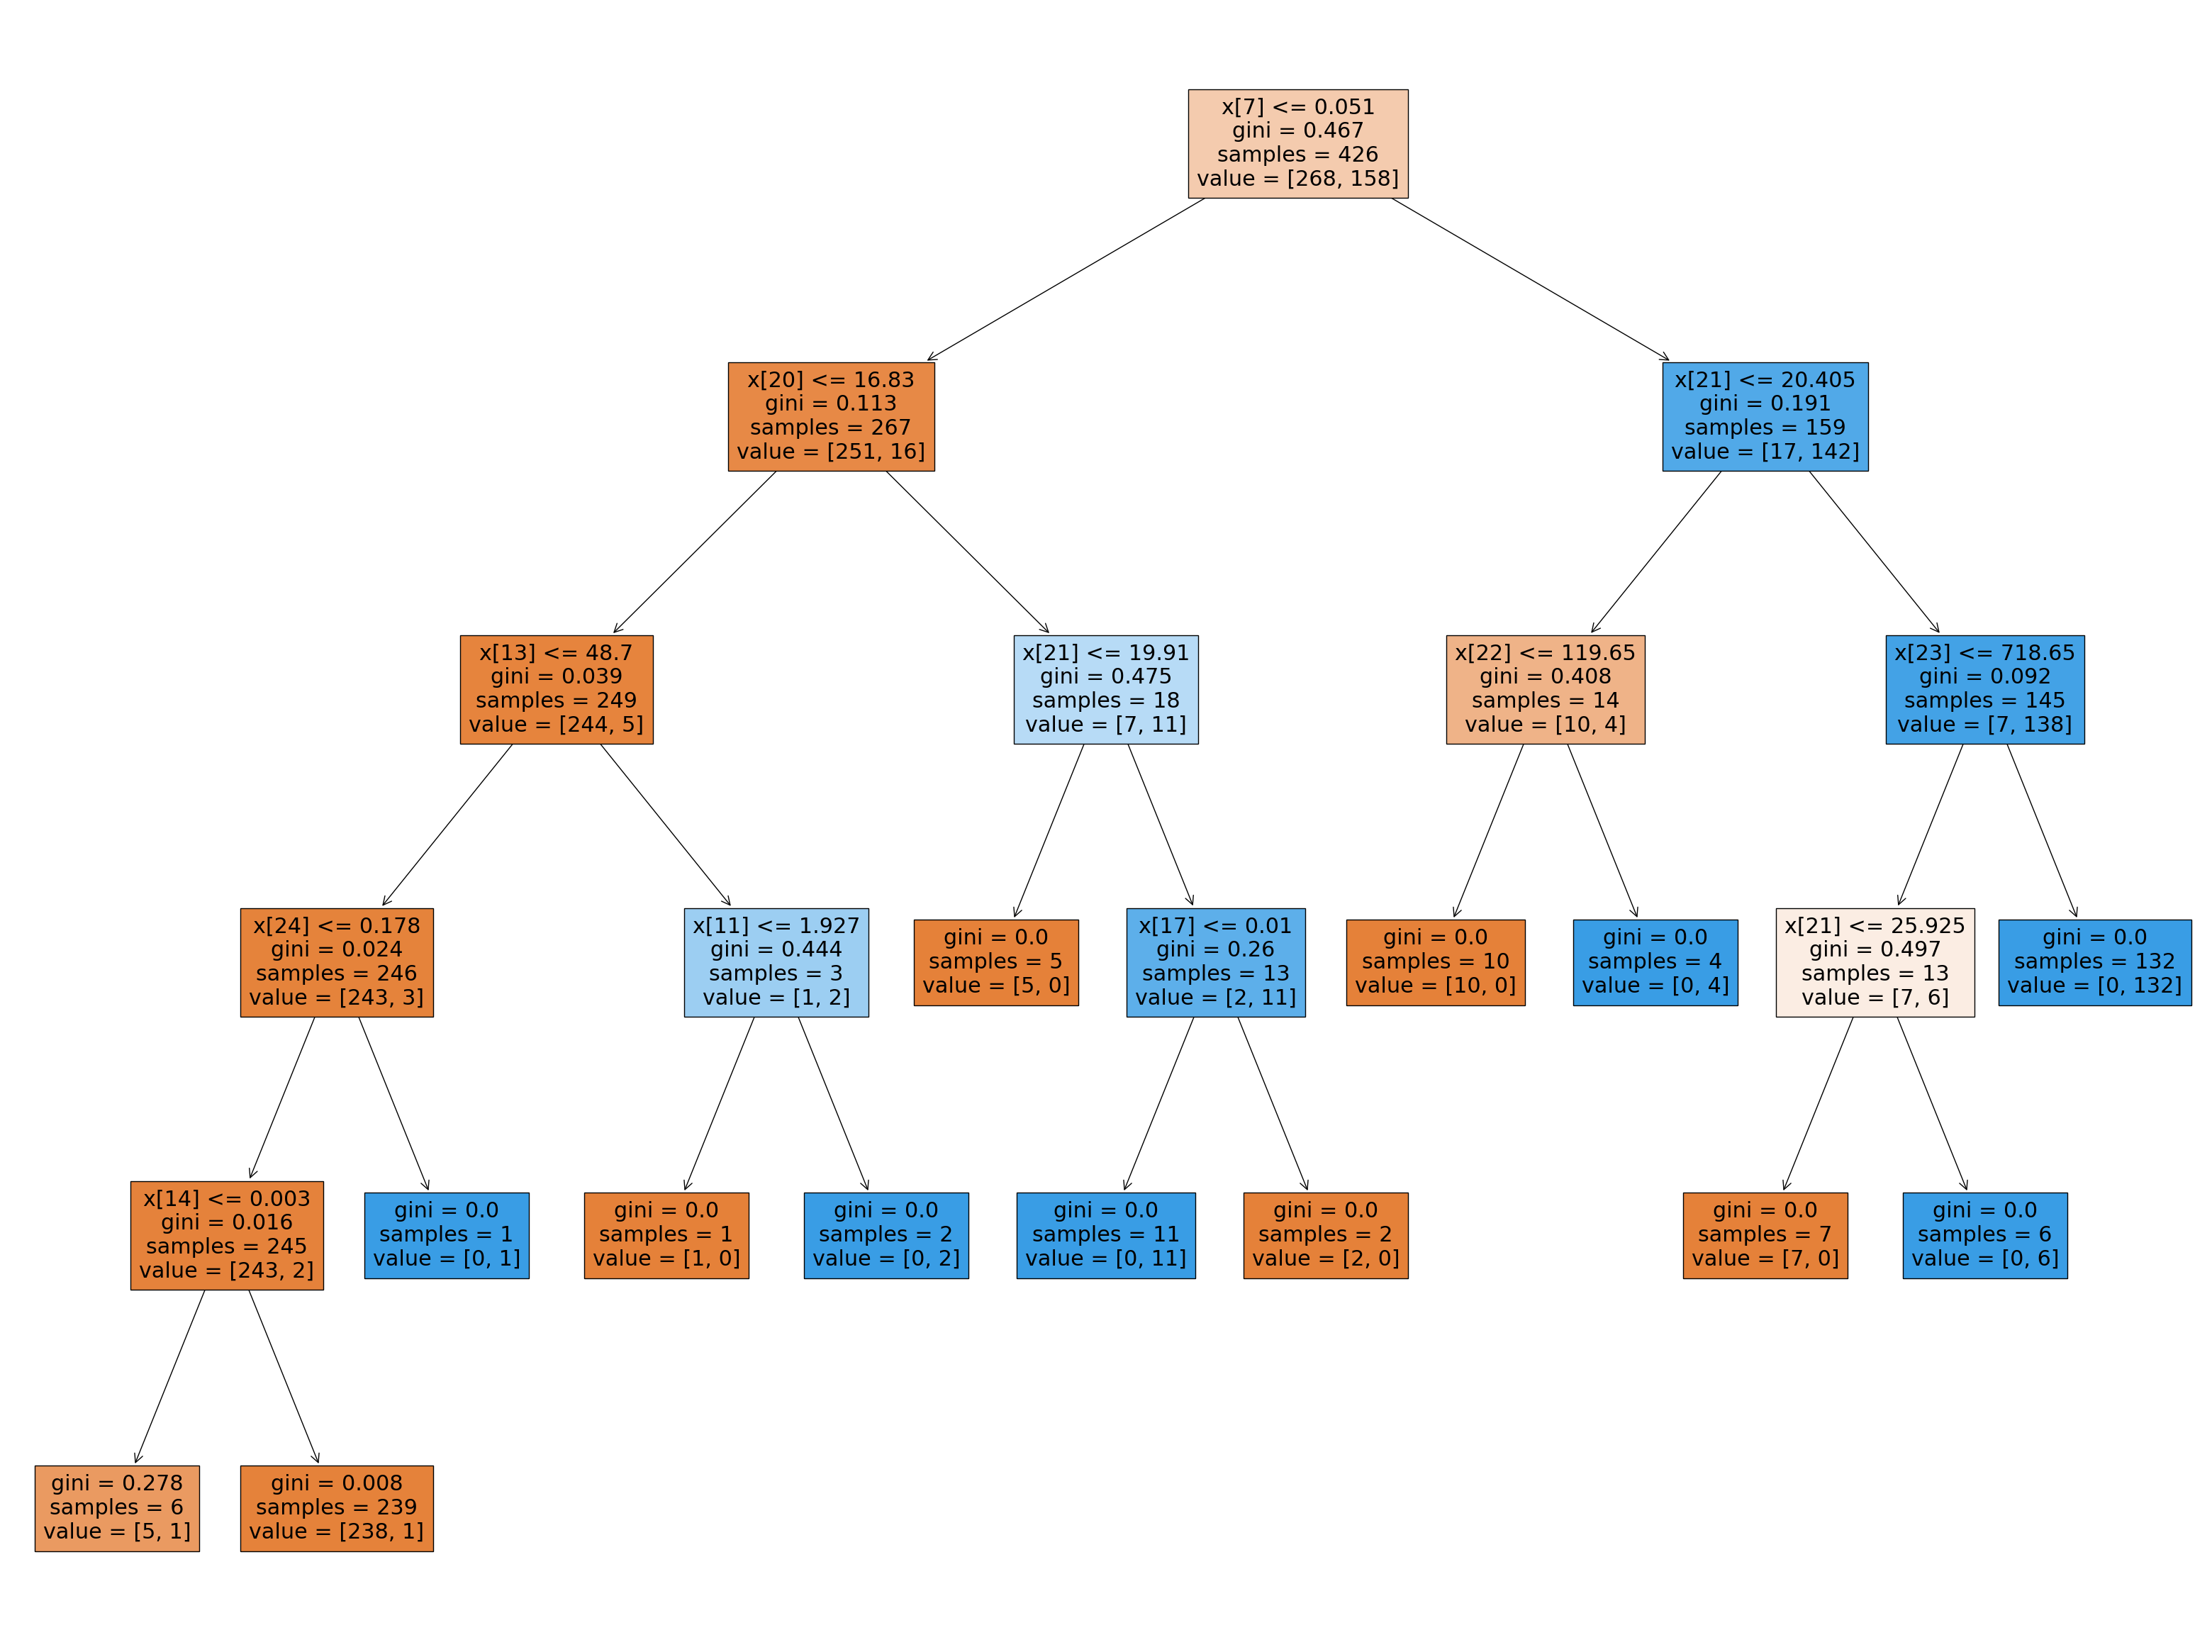

max_depth = 10: 0.951048951048951


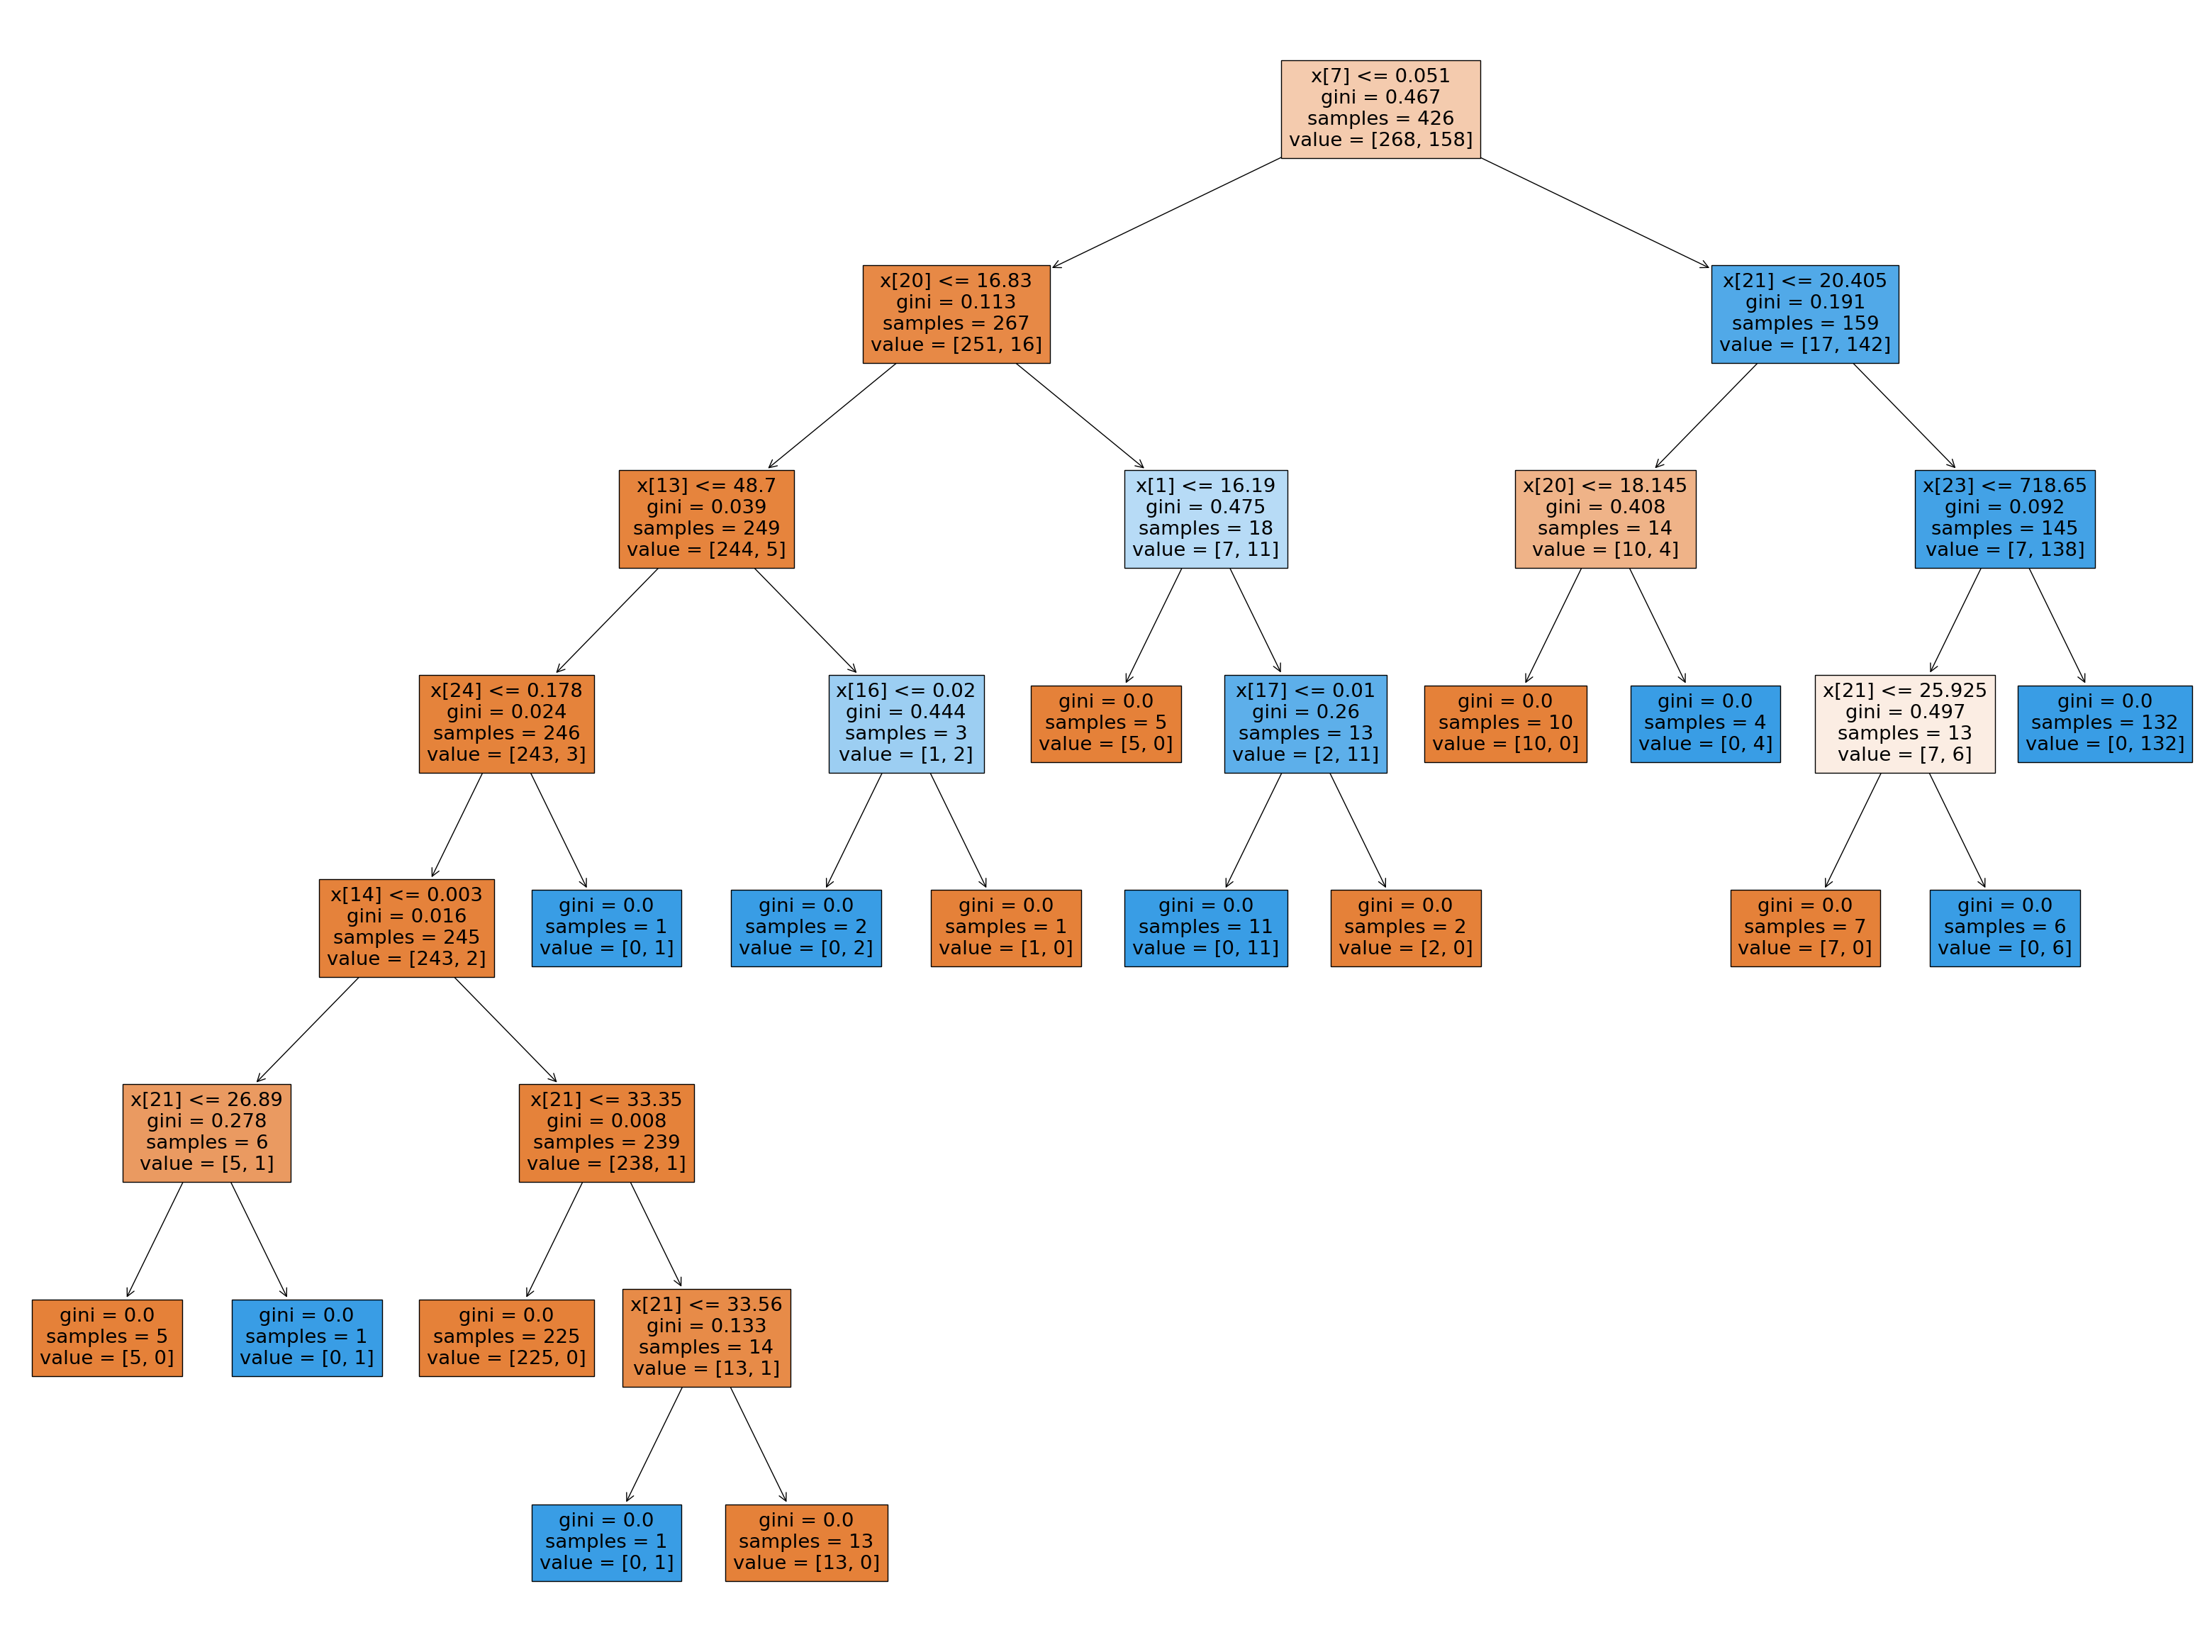

In [3]:


# max_depth
for depth in [1, 5, 10]:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    print(f"max_depth = {depth}: {clf.score(X_test, y_test)}")
    # Wydrukowanie drzewa
    plt.figure(figsize=(40,30))
    tree.plot_tree(clf, filled=True)
    plt.show()
    
# wnioski : Podobnie jak pozostałe podane parametry pomaga ograniczyć efekt przeuczenia poprzez ograniczenie głebokości
# drzewa. Dla niektórych przypadków będzie to zły wybór np, jeśli jedna noga nie zdąży podzielić swojego dużego zbioru danych
# ale skończy mu się dozwolona głębokość drzewa to nie jest w stanie dalej podzielić tego zbioru.
# dlatego lepszym rozwiązaniem może być dwa pozostałe parametry którymi ograniczamy drzewo (min samples: leaf, split)
# które ograniczają nadmierne rozdrabnianie danych w liściach, a nie ograniczają samej głębokości drzewa.
# Zbyt wysoka wartośc w porównaniu do całkowitej ilości danych może zakończyc naukę zbyt szybko, zanim 
# drzewo czegoś się nauczy, a zbyt mała dopuścić może od przeuczenia

Score dla split = 2: 0.951048951048951


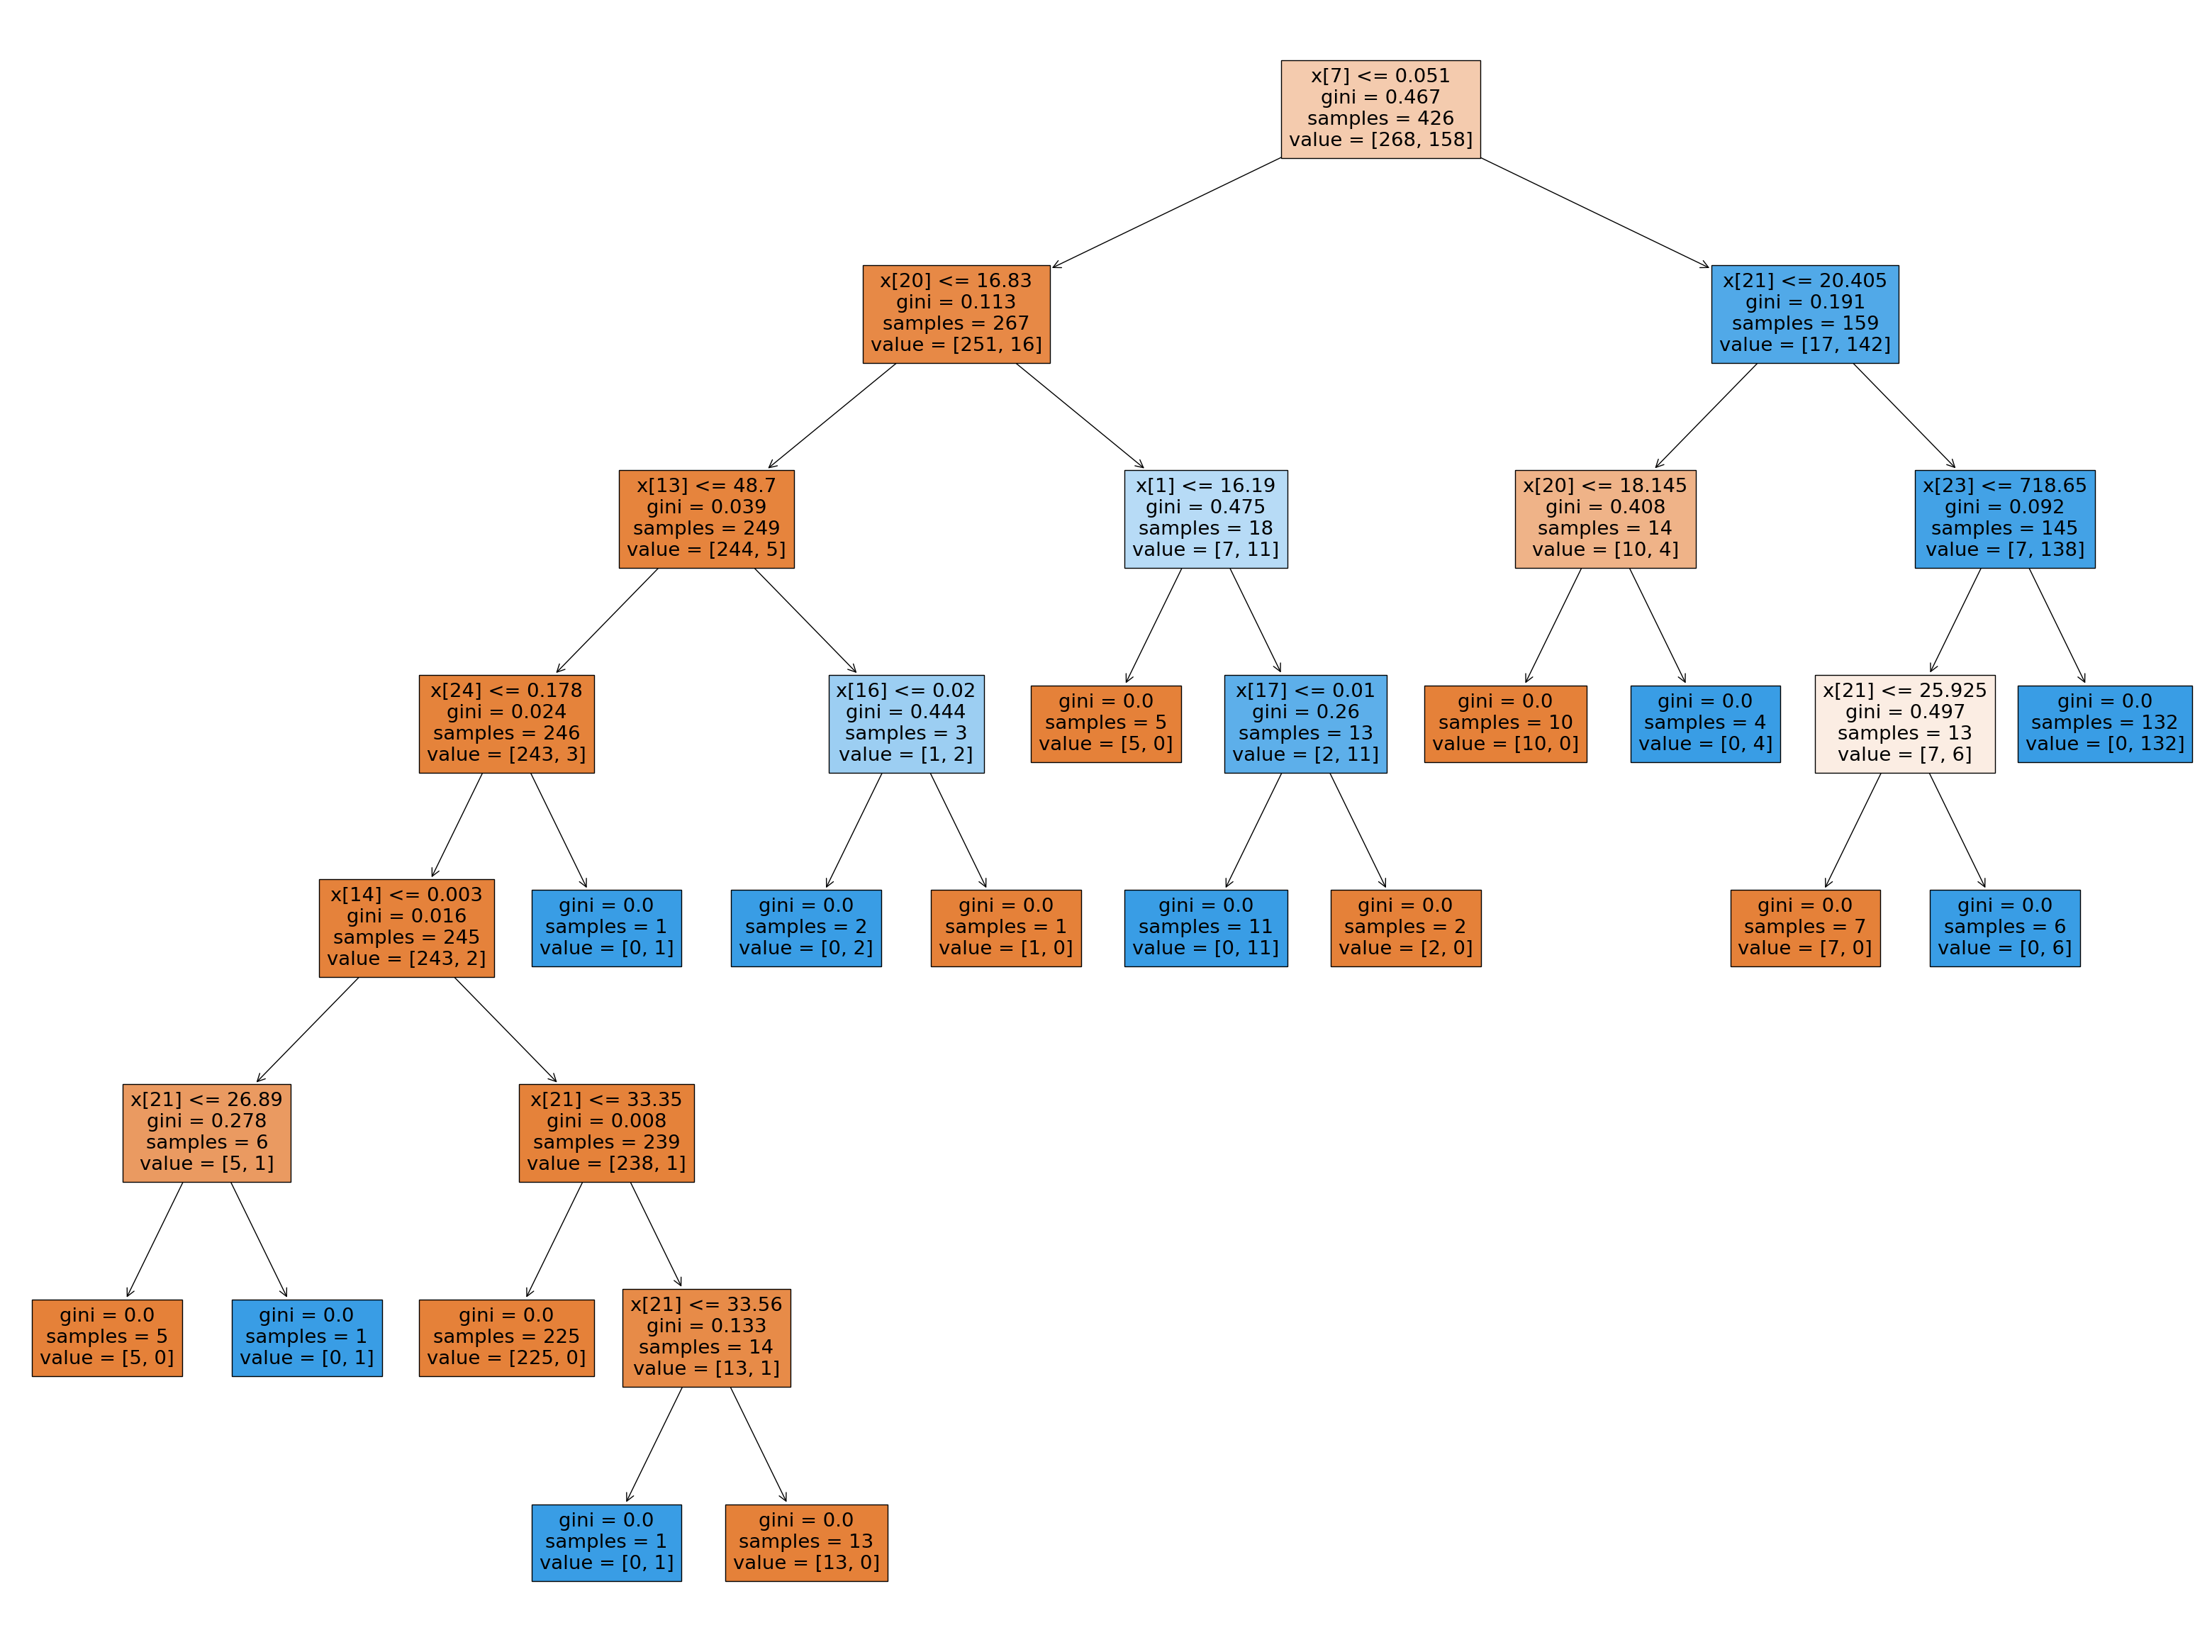

Score dla split = 5: 0.951048951048951


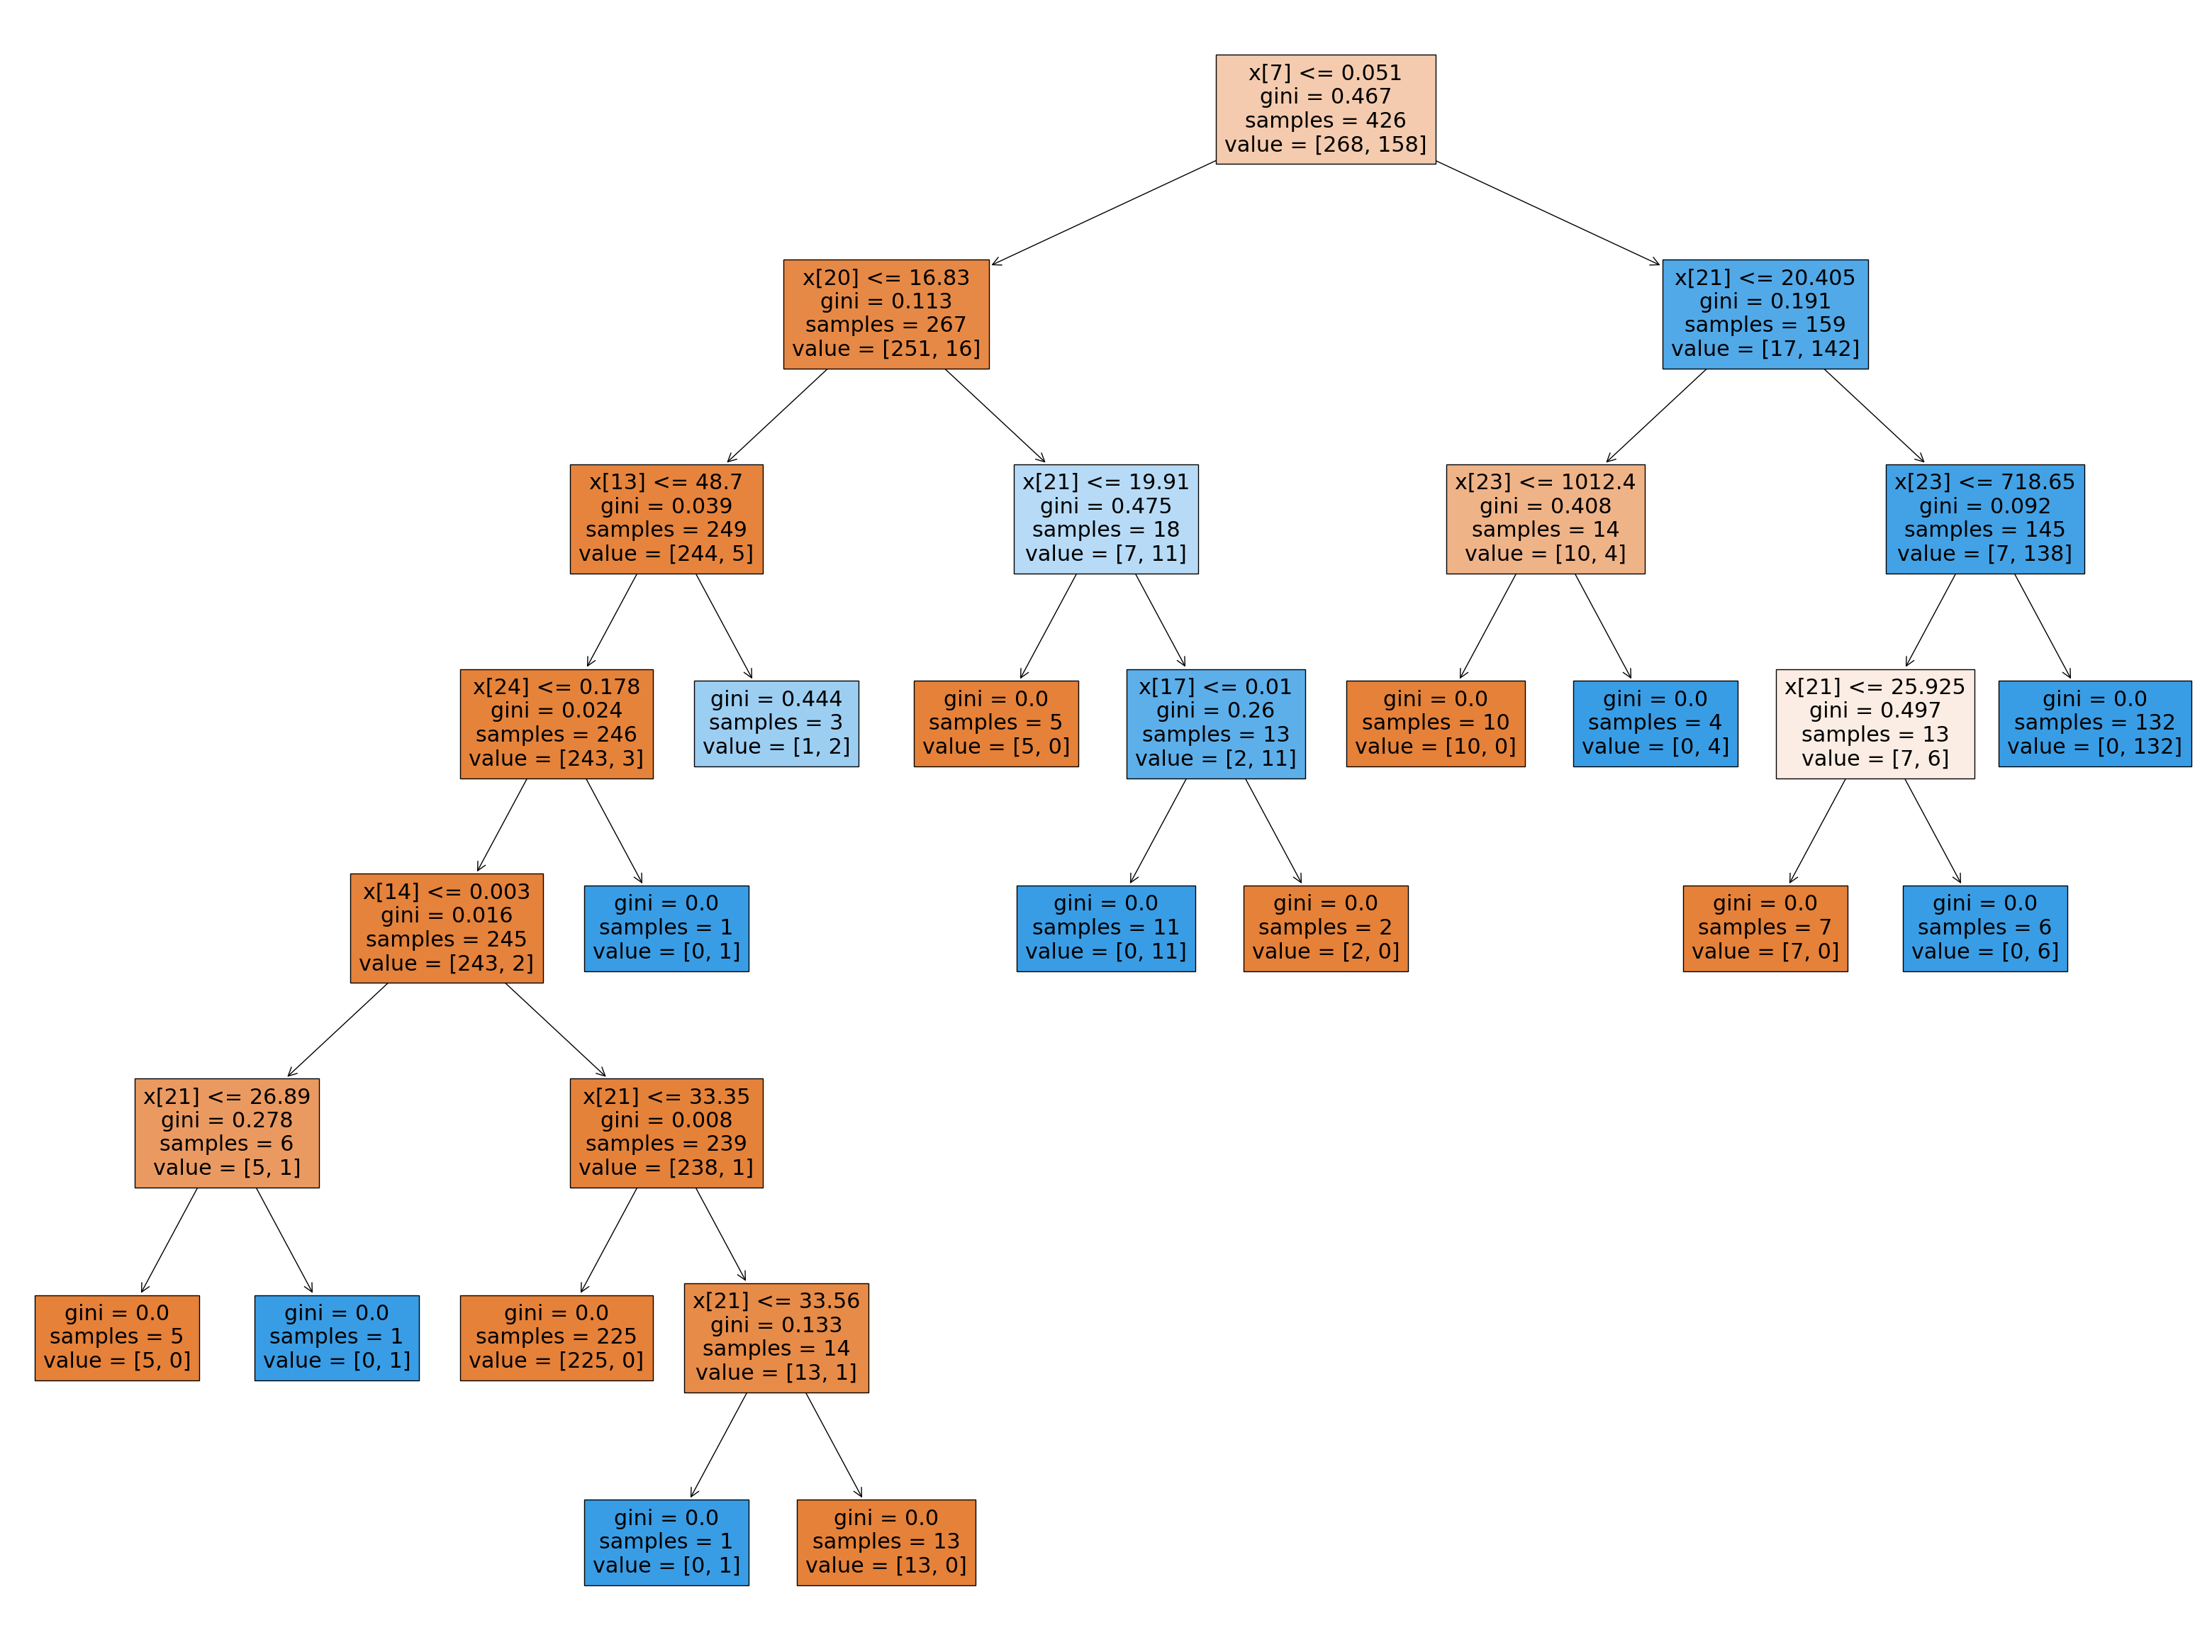

Score dla split = 10: 0.951048951048951


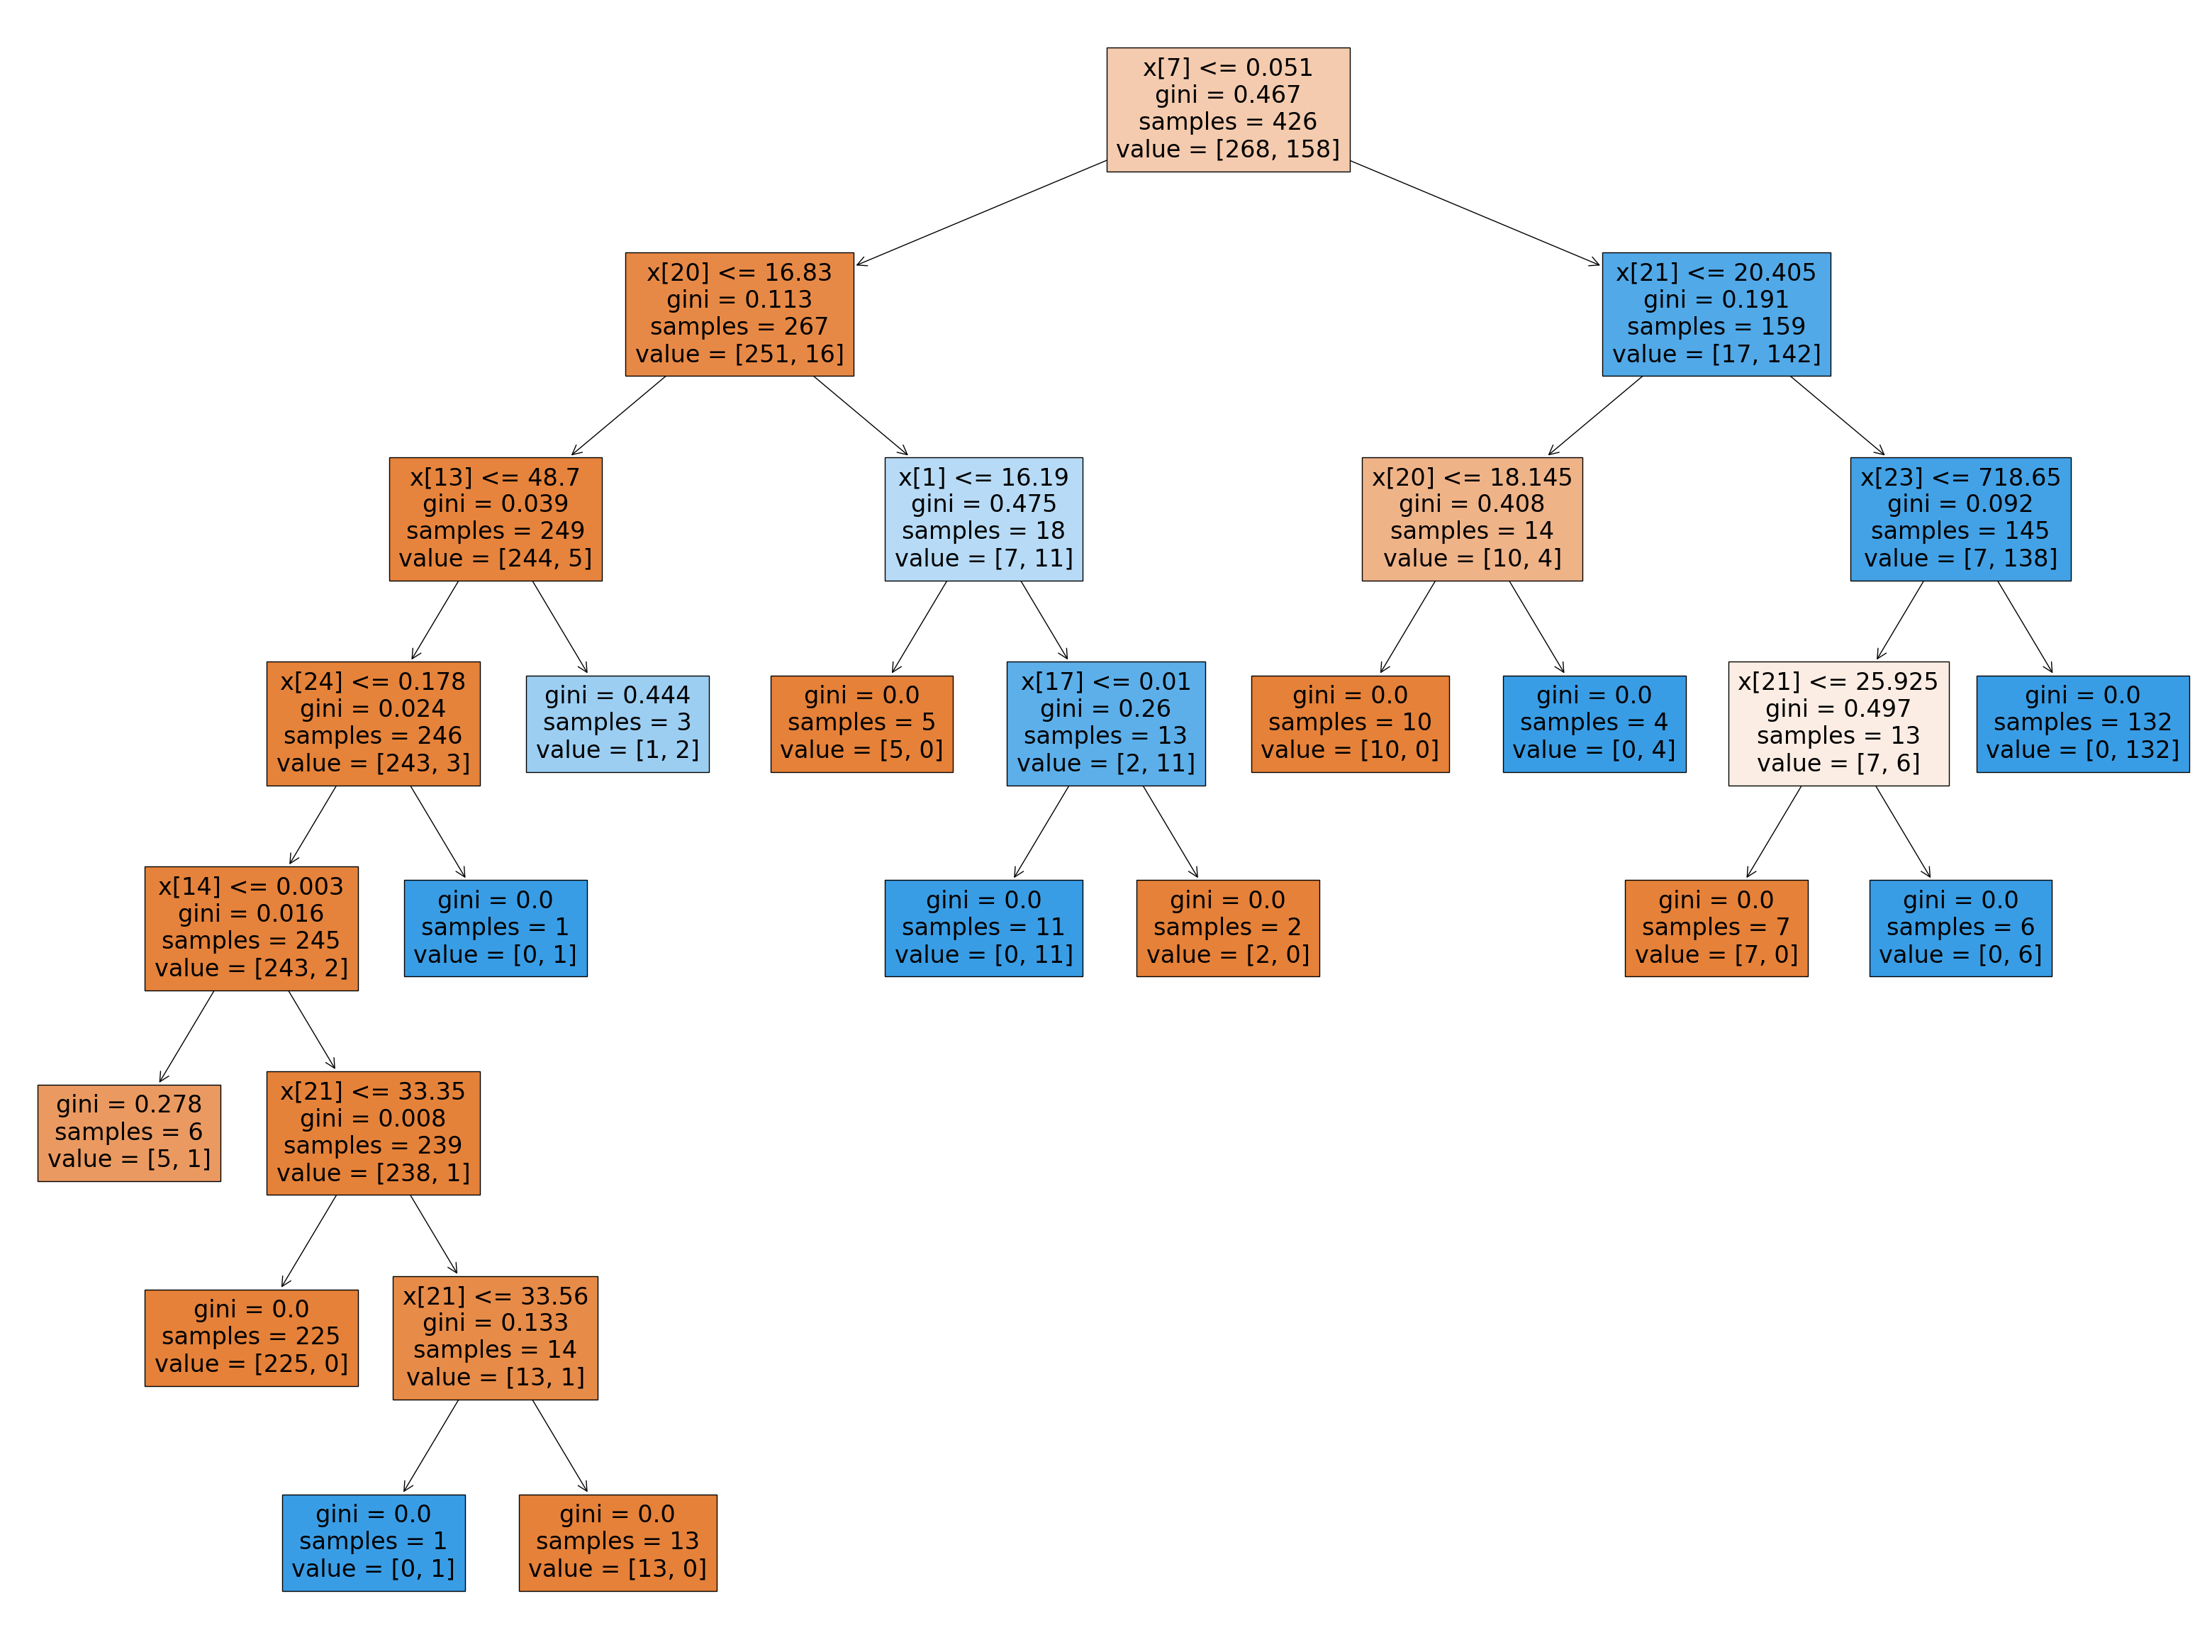

In [5]:


# min_samples_split
for split in [2, 5, 10]:
    clf = DecisionTreeClassifier(random_state=42, min_samples_split=split)
    clf.fit(X_train, y_train)
    print(f"Score dla split = {split}: {clf.score(X_test, y_test)}")
    plt.figure(figsize=(40,30))
    tree.plot_tree(clf, filled=True)
    plt.show()
    
# parametr ogranicza jaka musi być minimalna ilosc danych w węźle aby dopuścić do jego dalszego podziału. 
# Lekko odmienne podejście niż min_samples_leaf, bo tutaj sprawdzamy ilosc danych przed podziałem a nie po.
# Zbyt wysoka wartośc w porównaniu do całkowitej ilości danych może zakończyc naukę zbyt szybko, zanim 
# drzewo czegoś się nauczy, a zbyt mała dopuścić może od przeuczenia
